In [1]:
import pandas as pd 
import scipy.stats as st
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.pyplot import figure 
from scipy.stats import linregress
from scipy.optimize import curve_fit
import math

## Question 1 (Heesu) 
### Is there a correlation between yearly global average temperature and yearly average global CO2 level ?
* Heesu's data cleanup

### Findings: 
* From 1959 to 2015, both co2 levels and average global temperature has increased 
* There is a strong positive positive correlation between co2 levels and average global temperatures, therefore, as co2 levels increase, average global temperatures also increase.
* Theres is an outlier of 16.06 degrees recorded in 2015

In [3]:
global_temps = pd.read_csv("data_sets/GlobalTemperatures_kaggle.csv")
global_temps.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [3]:
#finding out data type
np.dtype(global_temps["dt"])

dtype('O')

In [4]:
#removing rows with NaN values
global_temps.dropna(how = "any", inplace = True)
global_temps.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200  1850-01-01                   0.749                              1.105   
1201  1850-02-01                   3.071                              1.275   
1202  1850-03-01                   4.954                              0.955   
1203  1850-04-01                   7.217                              0.665   
1204  1850-05-01                  10.004                              0.617   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   

      LandAndOceanAverageTemperatureUncertainty  
1200                                      0.367  
1201                                      0.414  
1202                                      0.341  
1203                                      0.267  
1204                                      0.249

In [5]:
# retrieving first value in list of values separated by hyphen 
splited_series = global_temps['dt'].str.split('-').str[0]
splited_series

1200    1850
1201    1850
1202    1850
1203    1850
1204    1850
        ... 
3187    2015
3188    2015
3189    2015
3190    2015
3191    2015
Name: dt, Length: 1992, dtype: object

In [6]:
#adding as new series to original dataframe 
global_temps["year"] = splited_series.astype("int64")

In [7]:
#checking if new column is added
global_temps.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200  1850-01-01                   0.749                              1.105   
1201  1850-02-01                   3.071                              1.275   
1202  1850-03-01                   4.954                              0.955   
1203  1850-04-01                   7.217                              0.665   
1204  1850-05-01                  10.004                              0.617   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   

      LandAndOceanAverageTemperatureUncertainty  year  
1200                                      0.367  1850  
1201                                      0.414  1850  
1202                                      0.341  1850  
1203                                      0.267  1850  
1204                                      0.249  1850

In [8]:
#checking data type
 print(np.dtype(global_temps["year"]))

int64


In [9]:
#getting data from last 50 years; 1966 to 2015 
average_temperatures = global_temps.groupby("year")["LandAndOceanAverageTemperature"].sum()/12
average_temperatures

year
1850    14.867167
1851    14.991833
1852    15.006500
1853    14.955167
1854    14.991000
          ...    
2011    15.769500
2012    15.802333
2013    15.854417
2014    15.913000
2015    16.058583
Name: LandAndOceanAverageTemperature, Length: 166, dtype: float64

In [10]:
#creating dataframe
ave_temps_year = pd.DataFrame(average_temperatures)
ave_temps_year.head()

LandAndOceanAverageTemperature
year                                
1850                       14.867167
1851                       14.991833
1852                       15.006500
1853                       14.955167
1854                       14.991000

In [11]:
#reading in excel of year and mean co2 emissions
mean_co2_emission = pd.read_excel("data_sets/global_mean_CO2_emissions_year.xlsx")
mean_co2_emission.head()

year  yearly mean co2 emission (ppm)
0  1959                          315.98
1  1960                          316.91
2  1961                          317.64
3  1962                          318.45
4  1963                          318.99

In [12]:
#merging dataframes on year
merged_df = pd.merge(ave_temps_year, mean_co2_emission, on = "year", how = "outer")
#dropping NaN values
merged_df.dropna(how = "any", inplace = True)
merged_df.head()

year  LandAndOceanAverageTemperature  yearly mean co2 emission (ppm)
109  1959                       15.340500                          315.98
110  1960                       15.291917                          316.91
111  1961                       15.379917                          317.64
112  1962                       15.325583                          318.45
113  1963                       15.376667                          318.99

## Scatter plot and Line of regression

### Is there a relationship between Average Global temperature and mean global levels?
* There is a strong positive positive correlation between co2 levels and average global temperatures, therefore, as co2 levels increase, average global temperatures also increase.
* Theres is an outlier of 16.06 degrees recorded in 2015.

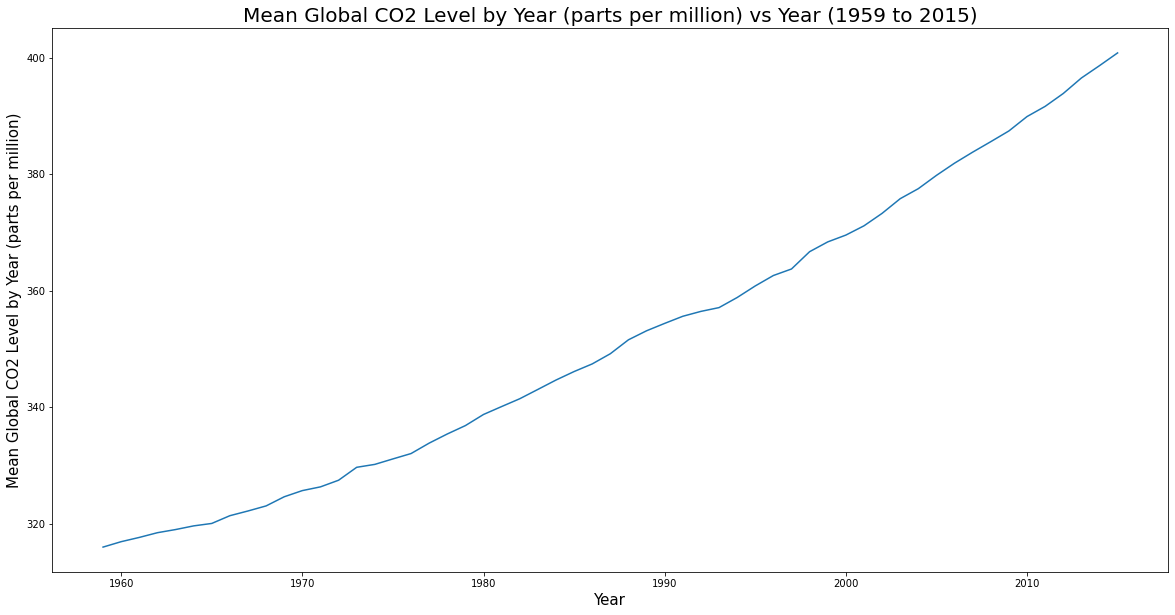

In [13]:
# Is there a relationship between co2 levels/average temp and time?
#mean CO2 emissions vs year
plt.figure(figsize=(20, 10))
plt.xlabel("Year",fontsize=15)
plt.ylabel("Mean Global CO2 Level by Year (parts per million)",fontsize=15)
plt.title("Mean Global CO2 Level by Year (parts per million) vs Year (1959 to 2015)",fontsize=20)
plt.plot(merged_df["year"], merged_df["yearly mean co2 emission (ppm)"])

plt.savefig("Q1_plots/plot_co2_vs_year_heesu.png")

plt.show()

* Mean CO2 levels have increased over time between 1959 to 2015

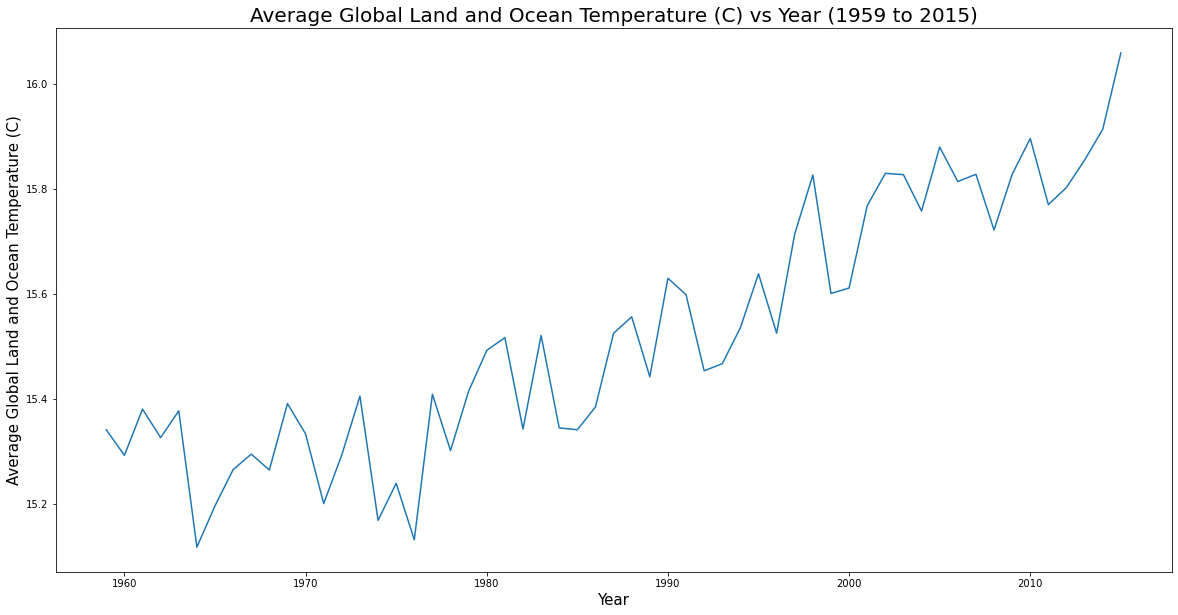

In [14]:
#ave temp vs year
plt.figure(figsize=(20, 10))
plt.xlabel("Year",fontsize=15)
plt.ylabel("Average Global Land and Ocean Temperature (C)",fontsize=15)
plt.title("Average Global Land and Ocean Temperature (C) vs Year (1959 to 2015)",fontsize=20)
plt.plot(merged_df["year"], merged_df["LandAndOceanAverageTemperature"])

plt.savefig("Q1_plots/plot_avetemp_vs_year_heesu.png")

plt.show()

* Average global temperature has increased from 1959 to 2015 

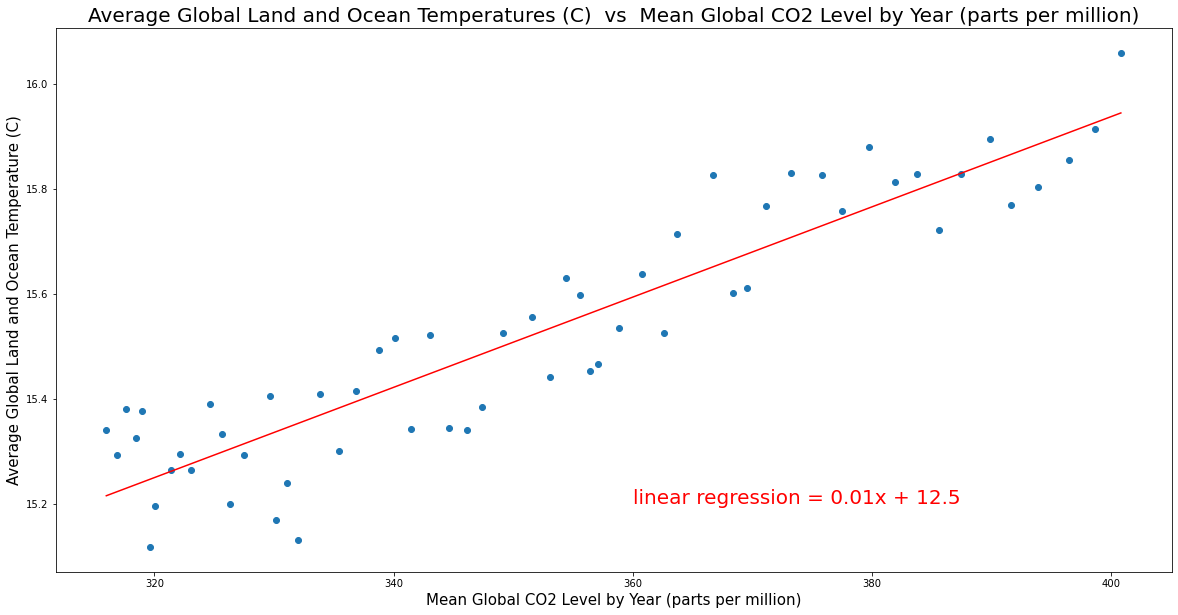

In [15]:
#creating x and y values
x_values = merged_df["yearly mean co2 emission (ppm)"]
y_values = merged_df["LandAndOceanAverageTemperature"]


#scatter plot configuration
plt.figure(figsize=(20, 10))
plt.scatter(x_values, y_values)
plt.xlabel("Mean Global CO2 Level by Year (parts per million)",fontsize=15)
plt.ylabel("Average Global Land and Ocean Temperature (C)",fontsize=15)
plt.title("Average Global Land and Ocean Temperatures (C)  vs  Mean Global CO2 Level by Year (parts per million)",fontsize=20)

#plotting line of regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
y_values_line = slope*x_values + intercept

line_eq = f"linear regression = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(360,15.2),fontsize=20,color="red")

plt.plot(x_values, y_values_line, color = "red")

plt.savefig("Q1_plots/average_temp_co2_scatter_heesu.png")

plt.show()


In [16]:
#viewing correlation coefficients and p value
print(f"correlation coefficient {rvalue}")
print(f"p value {pvalue}")

correlation coefficient 0.9215438739943146
p value 2.9278456849622948e-24


* strong positive correlation with a very small p value. this suggest that this correlation is of statistical significance 
* as co2 levels increase, global average temperatures also increase

### Are there any temperature outliers?
* Theres is an outlier of 16.06 degrees recorded in 2015

In [17]:
#creating groupby object by year
avetemp_gb = global_temps.groupby("year")

#finding mean temperature for each of the years
max_ave_temp_series = avetemp_gb["LandAndOceanAverageTemperature"].mean()
#finding maximum mean temperature 
max_average_mean = round(avetemp_gb["LandAndOceanAverageTemperature"].mean().max(),2)


# quartile calculations for average land and ocean temperatures by year
quartiles = max_ave_temp_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print("")
print(f"The upper quartile of temperatures is: {upperq}")
print("")
print(f"The interquartile range of temperatures is: {iqr}")
print("")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
print("")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print("")
print(f"Values above {upper_bound} could be outliers.")
print("")
print(f"Average mean temperature of {max_average_mean} degrees celsius is an outlier and was recorded in 2015")

The lower quartile of temperatures is: 14.991208333333331

The upper quartile of temperatures is: 15.379104166666668

The interquartile range of temperatures is: 0.3878958333333369

The the median of temperatures is: 15.144208333333335 

Values below 14.409364583333325 could be outliers.

Values above 15.960947916666672 could be outliers.

Average mean temperature of 16.06 degrees celsius is an outlier and was recorded in 2015


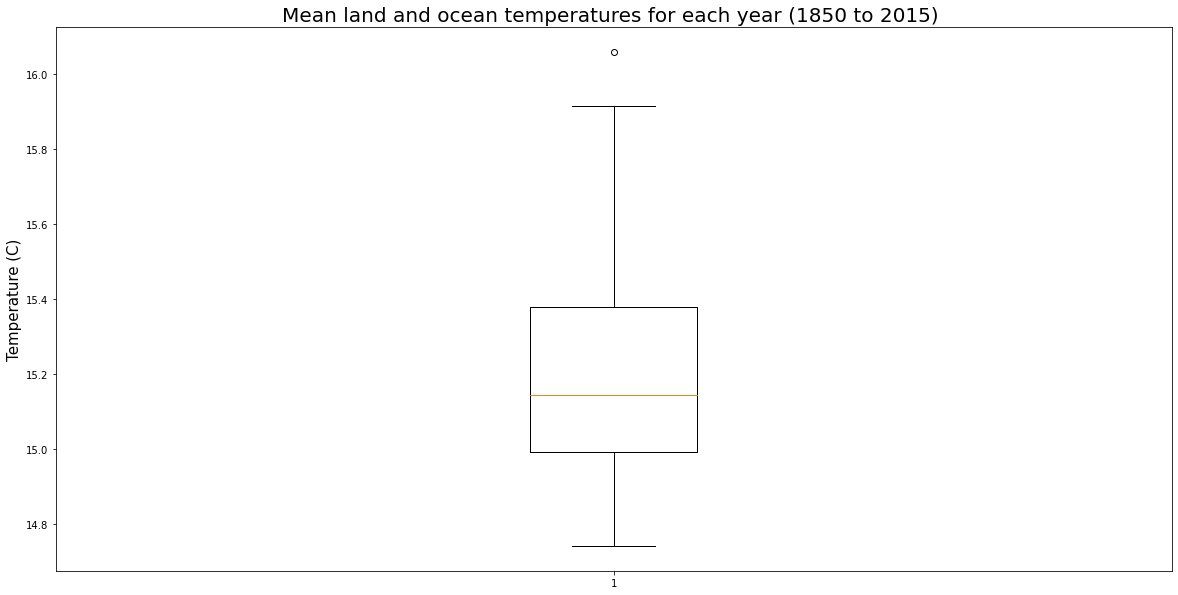

In [18]:
#turning into list
mean_ave_temp_list = list(max_ave_temp_series)

#boxplot of land and ocean mean temperatures for each year
plt.figure(figsize=(20, 10))
plt.boxplot(mean_ave_temp_list)
plt.title("Mean land and ocean temperatures for each year (1850 to 2015) ",fontsize=20)
plt.ylabel("Temperature (C)",fontsize=15)

plt.savefig("Q1_plots/mean_temp_boxplot_heesu.png")

plt.show()

In [19]:
#finding which year the outlier temp occured
merged_df.loc[merged_df["LandAndOceanAverageTemperature"] == (merged_df["LandAndOceanAverageTemperature"].max()),:]

year  LandAndOceanAverageTemperature  yearly mean co2 emission (ppm)
165  2015                       16.058583                          400.83

## Question 2 (Anne)
### Is there relationship between a Region’s average temperature and its CO2 level?



In [20]:
# Read in the files World bank dataset
file_basic_path="data_sets/"
newFile = pd.ExcelFile("data_sets/climate_change_data.xls")
climchang_df = pd.read_excel("data_sets/climate_change_data.xls", sheet_name="Data")

In [21]:
# Create df
climchang_df.columns
co2_df=climchang_df[climchang_df['Series name']=='CO2 emissions per capita (metric tons)'].copy()
co2_df
co2_df.drop(['Country code', 'Series code','Series name','SCALE','Decimals',2009,2010,2011], axis=1, inplace = True)
co2_df

Country name      1990       1991       1992       1993       1994  \
1864             Aruba   29.6206    29.8388    25.2393    24.4052    22.9779   
1865           Andorra        ..         ..         ..         ..         ..   
1866       Afghanistan  0.140715   0.126777  0.0701453  0.0654029  0.0607274   
1867            Angola  0.428613   0.409949   0.401597   0.510141   0.331321   
1868           Albania   2.27635    1.20648    0.73071     0.7266   0.606661   
...                ...       ...        ...        ...        ...        ...   
2092       Yemen, Rep. -0.251051   0.806199    1.09035   0.680109   0.782346   
2093      South Africa   9.47482    9.63839    8.85379    9.14103    9.37564   
2094  Congo, Dem. Rep.  0.111804  0.0991913  0.0917591  0.0830127  0.0581214   
2095            Zambia   0.31118   0.299524   0.296995    0.29497   0.278423   
2096          Zimbabwe   1.48092    1.47216    1.53568    1.44142    1.53843   

           1995       1996       1997       1998       1999       2000  \
1864    22.2331    21.8071    21.7451    19.2162    19.0726    24.7389   
1865    6.29124    6.52141    7.06224    7.53423    8.02344    8.11308   
1866  0.0564514  0.0518392   0.046827   0.043105  0.0330121  0.0300981   
1867   0.909699   0.842489   0.577043   0.556263   0.677678   0.685141   
1868   0.664265   0.647964   0.499307   0.569277   0.973817    0.98603   
...         ...        ...        ...        ...        ...        ...   
2092   0.742687     0.9507   0.953645   0.729809   0.807407   0.825961   
2093    9.03524    8.96594    9.07314    8.88357    8.64409    8.37751   
2094  0.0673197  0.0717289  0.0631078  0.0534875   0.046415  0.0331777   
2095   0.243385   0.204124    0.25386   0.238986   0.181781    0.17829   
2096    1.29486    1.26095    1.19204    1.16245    1.27641    1.11011   

           2001       2002       2003       2004       2005       2006  \
1864    24.2182    23.8404    23.2795    22.8063    22.5112    22.1353   
1865    7.89849    7.70122    7.41496    7.50037    7.39163    6.84056   
1866  0.0241743  0.0130843  0.0206349  0.0242207  0.0234208  0.0226567   
1867   0.676401   0.850599   0.587864    1.17772    1.16177    1.30897   
1868     1.0498    1.21411    1.38101    1.28145    1.46479    1.34059   
...         ...        ...        ...        ...        ...        ...   
2092   0.889748   0.837117   0.891083   0.942838   0.970709   0.976692   
2093    8.07716    7.63588    8.25758    8.87534    8.64857    8.49993   
2094  0.0307085  0.0294107   0.031384   0.040909   0.041255   0.041642   
2095   0.182476   0.184148   0.192096   0.188389   0.197069   0.194427   
2096   0.999056   0.946432   0.842544   0.787956   0.857045    0.82561   

           2007       2008  
1864     22.623    21.6838  
1865    6.62304    6.52783  
1866  0.0226127  0.0250348  
1867    1.43517    1.35109  
1868    1.41374    1.31286  
...         ...        ...  
2092    1.00134    1.03349  
2093    8.98017     8.9332  
2094  0.0419967  0.0450782  
2095    0.14266    0.15255  
2096    0.77064   0.728892  

[233 rows x 20 columns]

In [22]:
#change column name
co2_df.rename(columns = {"Country name":"Country"}, inplace=True)
co2_df

Country      1990       1991       1992       1993       1994  \
1864             Aruba   29.6206    29.8388    25.2393    24.4052    22.9779   
1865           Andorra        ..         ..         ..         ..         ..   
1866       Afghanistan  0.140715   0.126777  0.0701453  0.0654029  0.0607274   
1867            Angola  0.428613   0.409949   0.401597   0.510141   0.331321   
1868           Albania   2.27635    1.20648    0.73071     0.7266   0.606661   
...                ...       ...        ...        ...        ...        ...   
2092       Yemen, Rep. -0.251051   0.806199    1.09035   0.680109   0.782346   
2093      South Africa   9.47482    9.63839    8.85379    9.14103    9.37564   
2094  Congo, Dem. Rep.  0.111804  0.0991913  0.0917591  0.0830127  0.0581214   
2095            Zambia   0.31118   0.299524   0.296995    0.29497   0.278423   
2096          Zimbabwe   1.48092    1.47216    1.53568    1.44142    1.53843   

           1995       1996       1997       1998       1999       2000  \
1864    22.2331    21.8071    21.7451    19.2162    19.0726    24.7389   
1865    6.29124    6.52141    7.06224    7.53423    8.02344    8.11308   
1866  0.0564514  0.0518392   0.046827   0.043105  0.0330121  0.0300981   
1867   0.909699   0.842489   0.577043   0.556263   0.677678   0.685141   
1868   0.664265   0.647964   0.499307   0.569277   0.973817    0.98603   
...         ...        ...        ...        ...        ...        ...   
2092   0.742687     0.9507   0.953645   0.729809   0.807407   0.825961   
2093    9.03524    8.96594    9.07314    8.88357    8.64409    8.37751   
2094  0.0673197  0.0717289  0.0631078  0.0534875   0.046415  0.0331777   
2095   0.243385   0.204124    0.25386   0.238986   0.181781    0.17829   
2096    1.29486    1.26095    1.19204    1.16245    1.27641    1.11011   

           2001       2002       2003       2004       2005       2006  \
1864    24.2182    23.8404    23.2795    22.8063    22.5112    22.1353   
1865    7.89849    7.70122    7.41496    7.50037    7.39163    6.84056   
1866  0.0241743  0.0130843  0.0206349  0.0242207  0.0234208  0.0226567   
1867   0.676401   0.850599   0.587864    1.17772    1.16177    1.30897   
1868     1.0498    1.21411    1.38101    1.28145    1.46479    1.34059   
...         ...        ...        ...        ...        ...        ...   
2092   0.889748   0.837117   0.891083   0.942838   0.970709   0.976692   
2093    8.07716    7.63588    8.25758    8.87534    8.64857    8.49993   
2094  0.0307085  0.0294107   0.031384   0.040909   0.041255   0.041642   
2095   0.182476   0.184148   0.192096   0.188389   0.197069   0.194427   
2096   0.999056   0.946432   0.842544   0.787956   0.857045    0.82561   

           2007       2008  
1864     22.623    21.6838  
1865    6.62304    6.52783  
1866  0.0226127  0.0250348  
1867    1.43517    1.35109  
1868    1.41374    1.31286  
...         ...        ...  
2092    1.00134    1.03349  
2093    8.98017     8.9332  
2094  0.0419967  0.0450782  
2095    0.14266    0.15255  
2096    0.77064   0.728892  

[233 rows x 20 columns]

In [23]:
for x in range(1990,2009):
    co2_df[x]=pd.to_numeric(co2_df[x], errors='coerce')
co2_df.dropna(inplace=True)
co2_df

Country       1990       1991       1992       1993  \
1864                 Aruba  29.620641  29.838835  25.239288  24.405233   
1866           Afghanistan   0.140715   0.126777   0.070145   0.065403   
1867                Angola   0.428613   0.409949   0.401597   0.510141   
1868               Albania   2.276350   1.206479   0.730710   0.726600   
1869  United Arab Emirates  28.755863  29.851550  28.864884  31.097802   
...                    ...        ...        ...        ...        ...   
2092           Yemen, Rep.  -0.251051   0.806199   1.090354   0.680109   
2093          South Africa   9.474820   9.638386   8.853793   9.141031   
2094      Congo, Dem. Rep.   0.111804   0.099191   0.091759   0.083013   
2095                Zambia   0.311180   0.299524   0.296995   0.294970   
2096              Zimbabwe   1.480922   1.472161   1.535679   1.441422   

           1994       1995       1996       1997       1998       1999  \
1864  22.977867  22.233096  21.807148  21.745106  19.216200  19.072613   
1866   0.060727   0.056451   0.051839   0.046827   0.043105   0.033012   
1867   0.331321   0.909699   0.842489   0.577043   0.556263   0.677678   
1868   0.606661   0.664265   0.647964   0.499307   0.569277   0.973817   
1869  32.750397  30.078737  16.596476  15.946531  29.575575  27.053422   
...         ...        ...        ...        ...        ...        ...   
2092   0.782346   0.742687   0.950700   0.953645   0.729809   0.807407   
2093   9.375638   9.035237   8.965943   9.073136   8.883572   8.644088   
2094   0.058121   0.067320   0.071729   0.063108   0.053488   0.046415   
2095   0.278423   0.243385   0.204124   0.253860   0.238986   0.181781   
2096   1.538431   1.294860   1.260953   1.192042   1.162447   1.276405   

           2000       2001       2002       2003       2004       2005  \
1864  24.738875  24.218248  23.840384  23.279535  22.806292  22.511189   
1866   0.030098   0.024174   0.013084   0.020635   0.024221   0.023421   
1867   0.685141   0.676401   0.850599   0.587864   1.177717   1.161767   
1868   0.986030   1.049799   1.214113   1.381012   1.281453   1.464792   
1869  37.106499  32.175205  25.901280  31.275003  30.857381  28.414335   
...         ...        ...        ...        ...        ...        ...   
2092   0.825961   0.889748   0.837117   0.891083   0.942838   0.970709   
2093   8.377512   8.077164   7.635877   8.257580   8.875339   8.648574   
2094   0.033178   0.030709   0.029411   0.031384   0.040909   0.041255   
2095   0.178290   0.182476   0.184148   0.192096   0.188389   0.197069   
2096   1.110113   0.999056   0.946432   0.842544   0.787956   0.857045   

           2006       2007       2008  
1864  22.135312  22.622989  21.683831  
1866   0.022657   0.022613   0.025035  
1867   1.308968   1.435174   1.351088  
1868   1.340591   1.413737   1.312855  
1869  26.326396  25.526007  24.984026  
...         ...        ...        ...  
2092   0.976692   1.001337   1.033494  
2093   8.499927   8.980173   8.933203  
2094   0.041642   0.041997   0.045078  
2095   0.194427   0.142660   0.152550  
2096   0.825610   0.770640   0.728892  

[183 rows x 20 columns]

In [24]:
# SET UP TEMPERATURE DATAFRAME

# Import data from dataset temperatures by country
df_temp = pd.read_csv("data_sets/GlobalLandTemperaturesByCountry.csv")
df_temp.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [25]:
np.dtype(df_temp["dt"])

dtype('O')

In [26]:
# Drop NaN values
df_temp.dropna(how = "any", inplace = True)
df_temp

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
5       1744-04-01               1.530                          4.680   
6       1744-05-01               6.702                          1.789   
7       1744-06-01              11.609                          1.577   
8       1744-07-01              15.342                          1.410   
...            ...                 ...                            ...   
577456  2013-04-01              21.142                          0.495   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   

         Country  
0          Åland  
5          Åland  
6          Åland  
7          Åland  
8          Åland  
...          ...  
577456  Zimbabwe  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  

[544811 rows x 4 columns]

In [27]:
# Retrieving first value in list of values separated by hyphen
splited_series = df_temp['dt'].str.split('-').str[0]
splited_series

0         1743
5         1744
6         1744
7         1744
8         1744
          ... 
577456    2013
577457    2013
577458    2013
577459    2013
577460    2013
Name: dt, Length: 544811, dtype: object

In [28]:
# Adding as new series and check whether new column for year is added
df_temp["Year"] = splited_series.astype("int64")
df_temp.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country  Year
0  1743-11-01               4.384                          2.294   Åland  1743
5  1744-04-01               1.530                          4.680   Åland  1744
6  1744-05-01               6.702                          1.789   Åland  1744
7  1744-06-01              11.609                          1.577   Åland  1744
8  1744-07-01              15.342                          1.410   Åland  1744

In [29]:
#check data type
print(np.dtype(df_temp["Year"]))

int64


In [30]:
# Drop dt column
df_temp.drop(["dt"], axis=1, inplace=True)
df_temp.head()

AverageTemperature  AverageTemperatureUncertainty Country  Year
0               4.384                          2.294   Åland  1743
5               1.530                          4.680   Åland  1744
6               6.702                          1.789   Åland  1744
7              11.609                          1.577   Åland  1744
8              15.342                          1.410   Åland  1744

In [31]:
# Drop Uncertainty column
df_temp.drop(["AverageTemperatureUncertainty"], axis=1, inplace=True)
df_temp.head()

AverageTemperature Country  Year
0               4.384   Åland  1743
5               1.530   Åland  1744
6               6.702   Åland  1744
7              11.609   Åland  1744
8              15.342   Åland  1744

In [32]:
df_temp=df_temp[(df_temp["Year"]>=1990) & (df_temp["Year"]<2009)]
df_temp

AverageTemperature   Country  Year
2954                 0.515     Åland  1990
2955                 3.350     Åland  1990
2956                 3.134     Åland  1990
2957                 4.846     Åland  1990
2958                 8.708     Åland  1990
...                    ...       ...   ...
577400              19.294  Zimbabwe  2008
577401              22.692  Zimbabwe  2008
577402              25.558  Zimbabwe  2008
577403              24.970  Zimbabwe  2008
577404              23.938  Zimbabwe  2008

[55176 rows x 3 columns]

In [33]:
# Print df for 1990-2008
pivot = df_temp.pivot_table(index="Country", columns="Year", values="AverageTemperature", aggfunc=np.mean)
#pivot = pivot.iloc[:,243:262]
pivot

Year                 1990       1991       1992       1993       1994  \
Country                                                                 
Afghanistan     14.993333  14.370750  14.056083  14.439250  14.754750   
Africa          24.703750  24.422250  24.335417  24.538667  24.438750   
Albania         13.468667  12.338833  13.084667  13.122583  14.099667   
Algeria         24.014417  23.011083  22.767000  23.450833  23.642083   
American Samoa  27.156250  27.171167  27.072000  26.816417  26.986333   
...                   ...        ...        ...        ...        ...   
Western Sahara  23.401917  22.640333  22.734500  22.301917  22.944500   
Yemen           26.640667  26.594417  26.266500  26.402000  26.994250   
Zambia          22.219333  21.628917  22.414667  21.711583  21.846583   
Zimbabwe        22.130250  21.789667  22.840333  21.852250  21.608750   
Åland            7.221417   6.433667   6.782333   5.906750   5.899500   

Year                 1995       1996       1997       1998       1999  \
Country                                                                 
Afghanistan     14.859167  14.426000  14.904000  15.132500  15.388750   
Africa          24.718417  24.634500  24.706833  25.020500  24.743750   
Albania         12.782083  12.736500  12.900917  13.311250  13.653750   
Algeria         23.722500  23.734333  23.955167  23.920583  24.299417   
American Samoa  27.268667  27.112667  26.955750  27.424833  27.067167   
...                   ...        ...        ...        ...        ...   
Western Sahara  23.371083  23.262250  23.643333  23.690167  22.836250   
Yemen           26.577667  26.546167  26.940000  27.368667  27.353583   
Zambia          22.451417  22.018083  21.949750  22.300667  21.451750   
Zimbabwe        22.496333  21.553167  21.566667  22.142167  21.486333   
Åland            6.200167   5.236333   6.674250   5.841250   6.764000   

Year                 2000       2001       2002       2003       2004  \
Country                                                                 
Afghanistan     15.497833  15.778083  15.537667  14.916000  15.770917   
Africa          24.588083  24.841167  24.961333  25.025583  24.895917   
Albania         13.746583  13.690417  13.559917  13.626583  13.258167   
Algeria         24.032250  24.724417  24.263000  24.393667  23.916000   
American Samoa  27.219833  27.227583  27.537917  27.264833  27.281167   
...                   ...        ...        ...        ...        ...   
Western Sahara  23.020083  23.704917  23.457833  23.408917  23.420667   
Yemen           27.436167  27.068917  27.125167  27.357750  27.334083   
Zambia          21.558750  21.802417  22.292417  22.156750  21.768083   
Zimbabwe        21.149000  21.693667  22.081083  21.891250  21.330917   
Åland            7.283333   6.401500   6.801083   6.323417   6.518667   

Year                 2005       2006       2007       2008  
Country                                                     
Afghanistan     14.980000  15.595583  15.106167  15.216500  
Africa          25.156167  24.818917  24.851500  24.754667  
Albania         12.747083  12.976917  13.890500  13.955167  
Algeria         24.222583  24.200833  24.065333  23.950250  
American Samoa  27.373500  27.081250  27.452417  26.995083  
...                   ...        ...        ...        ...  
Western Sahara  23.507667  23.441833  23.145417  23.323083  
Yemen           27.294667  27.175000  27.310750  26.807500  
Zambia          22.813500  21.784250  21.838500  21.535833  
Zimbabwe        22.509917  21.618750  21.604250  21.545583  
Åland            6.724083   7.100583   7.029000   7.492250  

[242 rows x 19 columns]

In [34]:
# merge co2 and temp DFs
df = pivot.merge(co2_df, how="inner", on="Country", suffixes=("_temp","_CO2"))
df.head()

Country  1990_temp  1991_temp  1992_temp  1993_temp  1994_temp  \
0  Afghanistan  14.993333  14.370750  14.056083  14.439250  14.754750   
1      Albania  13.468667  12.338833  13.084667  13.122583  14.099667   
2      Algeria  24.014417  23.011083  22.767000  23.450833  23.642083   
3       Angola  22.466417  22.095417  22.498583  22.291000  22.189417   
4    Argentina  15.155083  15.097583  14.739167  15.098667  15.578667   

   1995_temp  1996_temp  1997_temp  1998_temp  ...  1999_CO2  2000_CO2  \
0  14.859167  14.426000  14.904000  15.132500  ...  0.033012  0.030098   
1  12.782083  12.736500  12.900917  13.311250  ...  0.973817  0.986030   
2  23.722500  23.734333  23.955167  23.920583  ...  3.060523  2.879789   
3  22.936167  22.479250  22.317167  23.120167  ...  0.677678  0.685141   
4  15.149833  15.211583  15.620667  15.261750  ...  3.981503  3.820041   

   2001_CO2  2002_CO2  2003_CO2  2004_CO2  2005_CO2  2006_CO2  2007_CO2  \
0  0.024174  0.013084  0.020635  0.024221  0.023421  0.022657  0.022613   
1  1.049799  1.214113  1.381012  1.281453  1.464792  1.340591  1.413737   
2  2.720701  2.889575  2.899500  2.762471  3.257306  3.213461  3.325072   
3  0.676401  0.850599  0.587864  1.177717  1.161767  1.308968  1.435174   
4  3.765786  3.489544  3.745910  4.042704  4.108565  4.497975  4.666922   

   2008_CO2  
0  0.025035  
1  1.312855  
2  3.232960  
3  1.351088  
4  4.844053  

[5 rows x 39 columns]

In [35]:
# Add column for region and check whether column has been added
df["Region"] = ""

# Create DF with data regions
region_df = pd.read_excel("data_sets/climate_change_data.xls", sheet_name="Country")

# rename column to make suitable for merge
region_df.rename(columns = {"Country name": "Country"}, inplace=True)

In [36]:
# Populate Region column through a merge and rename column
df_final = df.merge(region_df,how="inner", on="Country")
df_final = pd.merge(df, region_df, on='Country')
df_final.drop(["Region_x", "Country code", "Capital city", "Income group", "Lending category"],axis=1, inplace=True)
df_final.rename(columns = {"Region_y": "Region"}, inplace=True)
df_final.head()

Country  1990_temp  1991_temp  1992_temp  1993_temp  1994_temp  \
0  Afghanistan  14.993333  14.370750  14.056083  14.439250  14.754750   
1      Albania  13.468667  12.338833  13.084667  13.122583  14.099667   
2      Algeria  24.014417  23.011083  22.767000  23.450833  23.642083   
3       Angola  22.466417  22.095417  22.498583  22.291000  22.189417   
4    Argentina  15.155083  15.097583  14.739167  15.098667  15.578667   

   1995_temp  1996_temp  1997_temp  1998_temp  ...  2000_CO2  2001_CO2  \
0  14.859167  14.426000  14.904000  15.132500  ...  0.030098  0.024174   
1  12.782083  12.736500  12.900917  13.311250  ...  0.986030  1.049799   
2  23.722500  23.734333  23.955167  23.920583  ...  2.879789  2.720701   
3  22.936167  22.479250  22.317167  23.120167  ...  0.685141  0.676401   
4  15.149833  15.211583  15.620667  15.261750  ...  3.820041  3.765786   

   2002_CO2  2003_CO2  2004_CO2  2005_CO2  2006_CO2  2007_CO2  2008_CO2  \
0  0.013084  0.020635  0.024221  0.023421  0.022657  0.022613  0.025035   
1  1.214113  1.381012  1.281453  1.464792  1.340591  1.413737  1.312855   
2  2.889575  2.899500  2.762471  3.257306  3.213461  3.325072  3.232960   
3  0.850599  0.587864  1.177717  1.161767  1.308968  1.435174  1.351088   
4  3.489544  3.745910  4.042704  4.108565  4.497975  4.666922  4.844053   

                       Region  
0                  South Asia  
1       Europe & Central Asia  
2  Middle East & North Africa  
3          Sub-Saharan Africa  
4   Latin America & Caribbean  

[5 rows x 40 columns]

In [37]:
# Clean NAN value from merged dataframe 
df_final.dropna(inplace=True)

# Clean druplicated coutnry from merged dataframe 
df_final.drop_duplicates(subset=['Country'],inplace=True)
df_final.dtypes

Country       object
1990_temp    float64
1991_temp    float64
1992_temp    float64
1993_temp    float64
1994_temp    float64
1995_temp    float64
1996_temp    float64
1997_temp    float64
1998_temp    float64
1999_temp    float64
2000_temp    float64
2001_temp    float64
2002_temp    float64
2003_temp    float64
2004_temp    float64
2005_temp    float64
2006_temp    float64
2007_temp    float64
2008_temp    float64
1990_CO2     float64
1991_CO2     float64
1992_CO2     float64
1993_CO2     float64
1994_CO2     float64
1995_CO2     float64
1996_CO2     float64
1997_CO2     float64
1998_CO2     float64
1999_CO2     float64
2000_CO2     float64
2001_CO2     float64
2002_CO2     float64
2003_CO2     float64
2004_CO2     float64
2005_CO2     float64
2006_CO2     float64
2007_CO2     float64
2008_CO2     float64
Region        object
dtype: object

In [38]:
# Transfer "Region" column to a list of regions
region=df_final["Region"].unique()
# Transfer "Coutnry" column to a list of regions
country=df_final["Country"].unique()
# Create a year list
year = [x for x in range(1990,2009)]
#print(region)
#print(country)
#print(year)

In [39]:
# Create two dictionaries of CO2 and Life expectancy.
# Keys are country names and values are list of CO2/Life expectancy data from different years
co2_dict={}
temp_dict={}

In [40]:
# Loop the table
for index, row in df.iterrows():
    # Add the key (region) to the dictionary
    co2_dict[row["Country"]]=[]
    temp_dict[row["Country"]]=[]
    # Loop every year from 1990 to 2008
    for y in year:
        # Add the value to the correponding country.
        co2_dict[row["Country"]].append(row[f"{y}_CO2"])
        temp_dict[row["Country"]].append(row[f"{y}_temp"])

#co2_dict

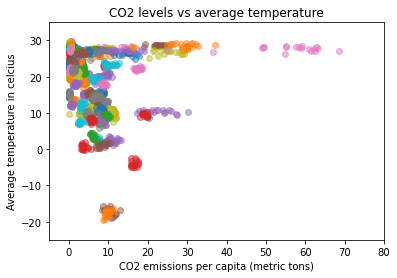

In [41]:
# Loop the country list
co2=[]
temp=[]
for x in co2_dict:
    for y in co2_dict[x]:
        co2.append(y)
    for y in temp_dict[x]:
        temp.append(y)
    # Plot the CO2/temp expectancy data of each region


for key in co2_dict:
    plt.scatter(co2_dict[key], temp_dict[key], alpha=0.5)

#plt.scatter(co2, lf, alpha=0.5, facecolors='none', edgecolors='blue')

# Set up the figure
plt.xlim(-5,80)
plt.ylim(-25,35)
plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel("Average temperature in celcius")
plt.title("CO2 levels vs average temperature")
plt.savefig("Question 2 plots/CO2_vs_avg_temp_all_regions.png")
plt.show()

In [42]:
# print list of regions
list(df_final["Region"].unique())

['South Asia',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'Sub-Saharan Africa',
 'Latin America & Caribbean',
 'East Asia & Pacific',
 'North America']

In [43]:
# Create DFs by region
sa = df_final[df_final["Region"]=="South Asia"]
eca = df_final[df_final["Region"]=="Europe & Central Asia"]
mena = df_final[df_final["Region"]=="Middle East & North Africa"]
eap = df_final[df_final["Region"]=="East Asia & Pacific"]
ssa = df_final[df_final["Region"]=="Sub-Saharan Africa"]
lac = df_final[df_final["Region"]=="Latin America & Caribbean"]
na = df_final[df_final["Region"]=="North America"]

In [44]:
# Charts South Asia
sa

Country  1990_temp  1991_temp  1992_temp  1993_temp  1994_temp  \
0    Afghanistan  14.993333  14.370750  14.056083  14.439250  14.754750   
9     Bangladesh  25.281750  25.135167  25.122250  25.003167  25.261667   
14        Bhutan  12.205583  11.994667  11.826833  12.087750  12.299667   
60         India  24.178167  24.311750  24.222917  24.408667  24.296417   
87         Nepal  15.272333  15.135000  15.075583  15.276250  15.458250   
97      Pakistan  21.376417  20.901333  20.708500  21.444833  21.163083   
118    Sri Lanka  27.528750  27.560000  27.269833  27.367417  27.365250   

     1995_temp  1996_temp  1997_temp  1998_temp  ...  2000_CO2  2001_CO2  \
0    14.859167  14.426000  14.904000  15.132500  ...  0.030098  0.024174   
9    25.415833  25.440250  24.859250  25.524167  ...  0.215025  0.245931   
14   12.428417  12.374667  11.578833  12.589833  ...  0.699684  0.704653   
60   24.429750  24.436917  24.047333  24.755417  ...  1.168064  1.165980   
87   15.453333  15.459833  14.691917  15.577750  ...  0.132550  0.138282   
97   21.073917  20.933833  20.738750  21.662750  ...  0.736561  0.733833   
118  27.587500  27.399583  27.657667  28.153250  ...  0.542076  0.541471   

     2002_CO2  2003_CO2  2004_CO2  2005_CO2  2006_CO2  2007_CO2  2008_CO2  \
0    0.013084  0.020635  0.024221  0.023421  0.022657  0.022613  0.025035   
9    0.250991  0.247771  0.286624  0.267824  0.327665  0.326002  0.319820   
14   0.847128  0.745813  0.730660  1.034535  0.625044  0.841420  1.045678   
60   1.169887  1.204355  1.247170  1.289192  1.355514  1.433501  1.528729   
87   0.106011  0.112913  0.103623  0.118551  0.119494  0.120580  0.122549   
97   0.758501  0.776383  0.844473  0.861267  0.903052  0.978331  0.974532   
118  0.575326  0.550338  0.610151  0.586756  0.585270  0.607420  0.574575   

         Region  
0    South Asia  
9    South Asia  
14   South Asia  
60   South Asia  
87   South Asia  
97   South Asia  
118  South Asia  

[7 rows x 40 columns]

In [45]:
sa_sum = sa.describe()
sa_sum

1990_temp  1991_temp  1992_temp  1993_temp  1994_temp  1995_temp  \
count   7.000000   7.000000   7.000000   7.000000   7.000000   7.000000   
mean   20.119476  19.915524  19.754571  20.003905  20.085583  20.178274   
std     5.944200   6.087134   6.101666   6.009350   5.903784   5.942560   
min    12.205583  11.994667  11.826833  12.087750  12.299667  12.428417   
25%    15.132833  14.752875  14.565833  14.857750  15.106500  15.156250   
50%    21.376417  20.901333  20.708500  21.444833  21.163083  21.073917   
75%    24.729958  24.723458  24.672583  24.705917  24.779042  24.922792   
max    27.528750  27.560000  27.269833  27.367417  27.365250  27.587500   

       1996_temp  1997_temp  1998_temp  1999_temp  ...  1999_CO2  2000_CO2  \
count   7.000000   7.000000   7.000000   7.000000  ...  7.000000  7.000000   
mean   20.067298  19.782536  20.485095  20.535310  ...  0.482092  0.503437   
std     5.981987   6.108857   6.039907   5.764282  ...  0.395827  0.404325   
min    12.374667  11.578833  12.589833  12.814917  ...  0.033012  0.030098   
25%    14.942917  14.797958  15.355125  15.666667  ...  0.166740  0.173787   
50%    20.933833  20.738750  21.662750  21.863000  ...  0.458717  0.542076   
75%    24.938583  24.453292  25.139792  25.187333  ...  0.701957  0.718122   
max    27.399583  27.657667  28.153250  27.361250  ...  1.145517  1.168064   

       2001_CO2  2002_CO2  2003_CO2  2004_CO2  2005_CO2  2006_CO2  2007_CO2  \
count  7.000000  7.000000  7.000000  7.000000  7.000000  7.000000  7.000000   
mean   0.507761  0.531561  0.522601  0.549560  0.597364  0.562671  0.618553   
std    0.400664  0.426046  0.423307  0.438573  0.484213  0.464060  0.505319   
min    0.024174  0.013084  0.020635  0.024221  0.023421  0.022657  0.022613   
25%    0.192107  0.178501  0.180342  0.195123  0.193187  0.223580  0.223291   
50%    0.541471  0.575326  0.550338  0.610151  0.586756  0.585270  0.607420   
75%    0.719243  0.802815  0.761098  0.787567  0.947901  0.764048  0.909876   
max    1.165980  1.169887  1.204355  1.247170  1.289192  1.355514  1.433501   

       2008_CO2  
count  7.000000  
mean   0.655846  
std    0.550349  
min    0.025035  
25%    0.221185  
50%    0.574575  
75%    1.010105  
max    1.528729  

[8 rows x 38 columns]

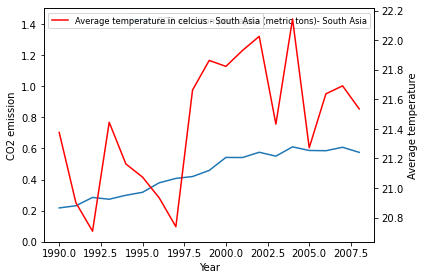

Trend Analysis
In the SA region, both CO2 emissions and temperature have increased over the years.
The increase in temperature has had dips and peaks but trending upwards, simultaneously with increase in CO2 emissions.


In [46]:
co2_mean=[]
temp_mean=[]
for y in year:
    co2_mean.append(sa_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(sa_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- South Asia")
ax1.set_ylim([0,1.5])
ax1.legend(loc="best", fontsize="small")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - South Asia")
ax2.tick_params(axis='y')

ax2.legend(loc="best",fontsize="small")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("Question 2 plots/CO2_vs_avg_temp_SA.png")
plt.show()

print(f"Trend Analysis\nIn the SA region, both CO2 emissions and temperature have increased over the years.\nThe increase in temperature has had dips and peaks but trending upwards, simultaneously with increase in CO2 emissions.")

In [47]:
# create list for unique countries in region
countries=[]
countries.append(sa["Country"]) #adding countries to list
def unique_countries(country):
    unique = []
    for country in countries:
        if country in unique:
            continue
        else:
            unique.append(country)
        return unique
print(unique_countries(country))

[0      Afghanistan
9       Bangladesh
14          Bhutan
60           India
87           Nepal
97        Pakistan
118      Sri Lanka
Name: Country, dtype: object]


[[ 1.         -0.57793114]
 [-0.57793114  1.        ]]
[[1.      0.46604]
 [0.46604 1.     ]]
[[1.         0.29609051]
 [0.29609051 1.        ]]
[[1.        0.5291349]
 [0.5291349 1.       ]]
[[1.         0.40101602]
 [0.40101602 1.        ]]
[[1.         0.45404604]
 [0.45404604 1.        ]]
[[1.         0.33587819]
 [0.33587819 1.        ]]
Each of the colours represents a country within the region. There is a slight positive correlation between CO2 emissions and average temperature for the majority of the countries.


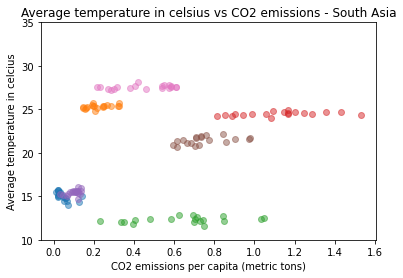

In [48]:
# scatter plot
# Loop the table
for index, row in sa.iterrows():
    # Add the key (region) to the dictionary
    co2_tmp=[]
    temp_tmp=[]
    # Loop every year from 1990 to 2008
    for y in year:
        # Add the value to the correponding country.
        co2_tmp.append(row[f"{y}_CO2"])
        temp_tmp.append(row[f"{y}_temp"])
    # Create scatter plot (colours represent country within region)    
    plt.scatter(co2_tmp, temp_tmp, alpha=0.5)
    # Calculate correlation efficient per country
    r=np.corrcoef(co2_tmp, temp_tmp)
    print(r)

# Set up the figure
#plt.xlim(-5,80)
plt.ylim(10,35)

plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Question 2 plots/temp_co2_SA.png')
plt.title('Average temperature in celsius vs CO2 emissions - South Asia')


print(f"Each of the colours represents a country within the region. There is a slight positive correlation between CO2 emissions and average temperature for the majority of the countries." )

In [49]:
# Europe & Central Asia
eca

Country  1990_temp  1991_temp  1992_temp  1993_temp  1994_temp  \
1           Albania  13.468667  12.338833  13.084667  13.122583  14.099667   
7           Austria   7.344000   6.357917   7.615583   6.858667   8.164917   
11          Belgium  10.935333   9.709167  10.489250   9.925833  10.996750   
18         Bulgaria  11.597667  10.180667  11.021750  10.713417  12.200417   
34           Cyprus  19.194417  19.082750  18.049250  18.949000  19.802000   
35          Denmark -17.870333 -17.827917 -19.000417 -18.716167 -18.085417   
44          Finland   2.943250   2.328250   2.649583   1.782917   1.773917   
45           France  14.038833  13.139500  13.462917  13.150167  14.156167   
48          Germany   9.689500   8.523083   9.505833   8.633500   9.847000   
50           Greece  15.499333  14.412833  14.785333  15.040583  16.044667   
51        Greenland -18.437917 -18.371333 -19.584500 -19.267167 -18.641917   
58          Hungary  10.920333   9.680167  10.996333  10.120917  11.545417   
59          Iceland   1.774750   2.540083   1.769083   1.703250   1.584333   
63          Ireland  10.312667   9.825167   9.789000   9.641583   9.884833   
65            Italy  13.716917  12.853500  13.581750  13.409667  14.284833   
74       Luxembourg  10.590917   9.453083  10.223833   9.652750  10.822167   
88      Netherlands  11.000333   9.751250  10.752167   9.847500  10.842000   
95           Norway   2.066500   1.133500   1.296167   0.419000   0.464500   
104          Poland   9.231667   7.944667   8.813500   7.831083   8.921000   
105        Portugal  15.742750  15.232833  15.111333  14.520167  15.312833   
107         Romania  10.226000   8.728167   9.562583   8.862917  10.609000   
117           Spain  14.762083  14.007167  13.955250  13.500667  14.651000   
122          Sweden   4.497917   3.459000   3.872250   2.945000   2.879917   
123     Switzerland   8.255583   7.405000   8.059667   7.617333   8.821083   
129          Turkey  12.032500  11.751083  10.516667  11.277417  12.744833   
132  United Kingdom   9.674583   8.828333   9.025000   8.669750   9.150750   

     1995_temp  1996_temp  1997_temp  1998_temp  ...   2000_CO2   2001_CO2  \
1    12.782083  12.736500  12.900917  13.311250  ...   0.986030   1.049799   
7     6.846500   5.863250   7.025083   7.222750  ...   7.712474   7.912097   
11   10.696750   8.893167  10.472417  10.369167  ...  11.286791  11.156421   
18   10.809667  10.428500  10.225333  11.098917  ...   5.400863   5.872763   
34   19.079000  19.475583  18.876250  19.964083  ...   7.261740   7.120559   
35  -17.697833 -16.805667 -17.455333 -16.620917  ...   8.853273   9.156746   
44    2.354083   1.693083   2.227583   1.226750  ...  10.073238  10.875902   
45   13.899750  13.013917  14.096000  13.720667  ...   6.016236   6.303892   
48    9.033500   7.374417   9.048667   9.171750  ...  10.121652  10.393849   
50   15.102250  14.846750  14.763250  15.506083  ...   8.391709   8.566748   
51  -18.239500 -17.300333 -17.997833 -17.139000  ...   9.461121   9.566087   
58   10.302750   9.357000   9.871917  10.361833  ...   5.607355   5.597195   
59    1.068250   2.319500   2.223667   1.607750  ...   7.699395   7.372600   
63   10.518917   9.591167  10.683500  10.459500  ...  10.761502  11.323735   
65   13.234083  13.007000  13.838833  13.662333  ...   7.834373   7.845726   
74   10.342667   8.652583  10.167000   9.995417  ...  18.877107  19.434415   
88   10.594667   8.739333  10.409417  10.518583  ...  10.383550  10.424529   
95    0.506000   0.255667   1.043750   0.465417  ...   8.641252   9.105341   
104   8.262250   6.768500   7.980667   8.315167  ...   7.845564   7.916900   
105  16.347417  15.296333  16.267583  15.645000  ...   6.157546   6.107392   
107   9.138750   8.649417   8.523667   9.178417  ...   4.009469   4.322792   
117  15.072167  14.151250  15.105917  14.552000  ...   7.312925   7.314107   
122   3.066000   2.391750   3.730583   2.872917  ...   5.614409   5.748705   
123   7.751917   6.974583   8.212

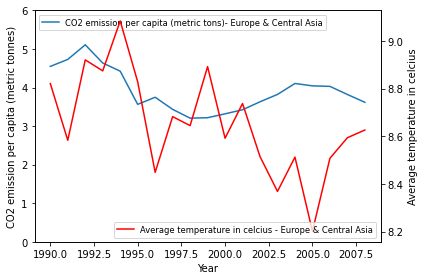

Trend Analysis
In the ECA region, both temperature and CO2 emissions have decreased over the years.
Temperature increases/decreases when CO2 emissions increase/decrease. This is as expected, as it will take time for a change in CO2 emissions to show its effects in change in temperature.


In [50]:
eca_sum = eca.describe(include='all')
#print eca_sum
co2_mean=[]
temp_mean=[]

for y in year:
    co2_mean.append(eca_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(eca_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list


fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission per capita (metric tonnes)")
ax1.set_ylim([0,6])
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- Europe & Central Asia")
ax1.legend(loc="upper left", fontsize="small")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature in celcius')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - Europe & Central Asia")
ax2.tick_params(axis='y')

ax2.legend(loc="lower right", fontsize="small")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("Question 2 plots/CO2_vs_avg_temp_ECA.png")
plt.show()

print(f"Trend Analysis\nIn the ECA region, both temperature and CO2 emissions have decreased over the years.\nTemperature increases/decreases when CO2 emissions increase/decrease. This is as expected, as it will take time for a change in CO2 emissions to show its effects in change in temperature.")

In [51]:
# create list for unique countries in region
countries=[]
countries.append(eca["Country"]) #adding countries to list
def unique_countries(country):
    unique = []
    for country in countries:
        if country in unique:
            continue
        else:
            unique.append(country)
        return unique
print(unique_countries(country))

[1             Albania
7             Austria
11            Belgium
18           Bulgaria
34             Cyprus
35            Denmark
44            Finland
45             France
48            Germany
50             Greece
51          Greenland
58            Hungary
59            Iceland
63            Ireland
65              Italy
74         Luxembourg
88        Netherlands
95             Norway
104            Poland
105          Portugal
107           Romania
117             Spain
122            Sweden
123       Switzerland
129            Turkey
132    United Kingdom
Name: Country, dtype: object]


[[1.         0.16054385]
 [0.16054385 1.        ]]
[[ 1.         -0.14579062]
 [-0.14579062  1.        ]]
[[ 1.         -0.50036005]
 [-0.50036005  1.        ]]
[[ 1.         -0.18343564]
 [-0.18343564  1.        ]]
[[1.         0.65836282]
 [0.65836282 1.        ]]
[[ 1.         -0.39918264]
 [-0.39918264  1.        ]]
[[ 1.         -0.14672589]
 [-0.14672589  1.        ]]
[[ 1.         -0.55372772]
 [-0.55372772  1.        ]]
[[ 1.         -0.31342736]
 [-0.31342736  1.        ]]
[[1.         0.54594685]
 [0.54594685 1.        ]]
[[1.         0.49204715]
 [0.49204715 1.        ]]
[[ 1.         -0.74072591]
 [-0.74072591  1.        ]]
[[1.         0.05715655]
 [0.05715655 1.        ]]
[[1.         0.43527223]
 [0.43527223 1.        ]]
[[1.        0.0339104]
 [0.0339104 1.       ]]
[[ 1.         -0.08212307]
 [-0.08212307  1.        ]]
[[ 1.         -0.81392892]
 [-0.81392892  1.        ]]
[[1.         0.55280345]
 [0.55280345 1.        ]]
[[ 1.         -0.42539506]
 [-0.42539506  1.  

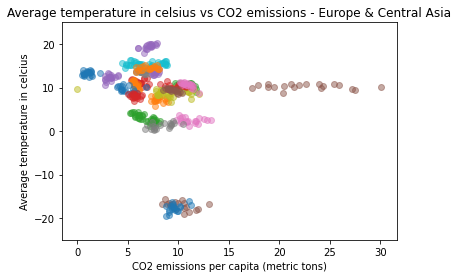

In [52]:
# scatter plot
# Loop the table
for index, row in eca.iterrows():
    # Add the key (region) to the dictionary
    co2_tmp=[]
    temp_tmp=[]
    # Loop every year from 1990 to 2008
    for y in year:
        # Add the value to the correponding country.
        co2_tmp.append(row[f"{y}_CO2"])
        temp_tmp.append(row[f"{y}_temp"])
    # create scatterplot
    plt.scatter(co2_tmp, temp_tmp, alpha=0.5)    
    # calculate correlation coefficient
    r=np.corrcoef(co2_tmp, temp_tmp)
    print(r)
    
# Set up the figure
#plt.xlim(-5,80)
plt.ylim(-25,25)

plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Question 2 plots/Scatterplot_temp_co2_ECA.png')
plt.title('Average temperature in celsius vs CO2 emissions - Europe & Central Asia')

print(f"Each of the colours represents a country within the region. There is a varying correlation (from positive to negative or no correlation at all) between CO2 emissions and average temperature for the countries within this region." )

In [53]:
#print df MENA
mena

Country  1990_temp  1991_temp  1992_temp  1993_temp  \
2                 Algeria  24.014417  23.011083  22.767000  23.450833   
8                 Bahrain  26.344583  25.811917  25.177667  26.165917   
36               Djibouti  29.303000  29.289417  28.999000  28.740833   
62                   Iraq  22.541500  22.280333  20.685833  21.903083   
64                 Israel  20.129833  20.021917  19.028667  19.975417   
68                 Jordan  19.921583  19.791750  18.604917  19.679917   
71                Lebanon  18.184583  18.114833  16.921250  17.926250   
73                  Libya  23.101000  22.618167  22.397833  23.002750   
79                  Malta  19.561750  18.590083  18.832083  19.051250   
84                Morocco  18.697667  17.617250  17.685750  17.502667   
96                   Oman  27.444500  27.010833  26.738917  27.368583   
106                 Qatar  27.320333  26.719750  26.147417  27.049750   
110          Saudi Arabia  26.018750  25.776250  24.771250  25.741000   
128               Tunisia  20.929000  19.924750  20.033167  20.567667   
131  United Arab Emirates  28.260083  27.697083  27.284083  28.070417   

     1994_temp  1995_temp  1996_temp  1997_temp  1998_temp  ...   2000_CO2  \
2    23.642083  23.722500  23.734333  23.955167  23.920583  ...   2.879789   
8    26.733750  26.257417  26.827500  26.190917  27.612417  ...  29.212210   
36   29.062333  29.259750  29.165250  29.269333  29.780500  ...   0.551105   
62   22.642417  22.431000  23.013750  21.921167  23.455417  ...   2.979614   
64   20.500333  20.043333  20.528083  19.823167  20.966417  ...   9.968363   
68   20.265583  19.847917  20.422000  19.484583  20.773583  ...   3.232463   
71   18.664250  18.104833  18.500167  17.731583  19.001667  ...   4.102720   
73   22.816083  22.949500  23.123250  23.046500  23.276333  ...   9.511003   
79   19.837667  19.072750  18.962417  19.396667  19.311083  ...   5.293644   
84   18.460417  18.788833  18.248333  18.799250  18.712667  ...   1.177536   
96   27.756083  27.323500  27.173583  27.346500  28.186750  ...   9.741792   
106  27.529583  27.103083  27.608083  27.157917  28.424833  ...  58.769347   
110  26.297583  25.989167  26.433000  25.867667  26.853750  ...  14.853844   
128  21.266000  20.683167  20.527500  21.084000  20.761333  ...   2.083213   
131  28.397417  27.986333  28.319250  28.120667  29.292583  ...  37.106499   

      2001_CO2   2002_CO2   2003_CO2   2004_CO2   2005_CO2   2006_CO2  \
2     2.720701   2.889575   2.899500   2.762471   3.257306   3.213461   
8    21.676341  24.449713  25.447177  25.716382  25.655598  24.878711   
36    0.513651   0.522294   0.522083   0.577489   0.585183   0.592111   
62    3.422208   3.411545   3.473215   3.678480   3.533806   3.547070   
64   10.211106   9.611224   9.734705   9.281942   8.544040   9.325410   
68    3.254253   3.351833   3.382957   3.637193   3.885536   3.744486   
71    4.262044   4.146166   4.630082   4.210860   4.328096   3.667486   
73    9.580003   8.763482   8.873233   8.901536   9.028775   9.124977   
79    6.325824   5.806538   6.476881   6.415249   6.683172   6.334113   
84    1.294752   1.298779   1.261696   1.349306   1.409008   1.432899   
96    8.969720  11.092366  13.994763  13.270568  14.263432  15.625776   
106  49.499859  49.326280  55.007806  62.613420  63.211046  58.490677   
110  14.304643  15.070477  14.492077  14.905729  15.266916  15.460010   
128   2.151997   2.148415   2.174530   2.259847   2.273547   2.283570   
131  32.175205  25.901280  31.275003  30.857381  28.414335  26.326396   

      2007_CO2   2008_CO2                      Region  
2     3.325072   3.232960  Middle East & North Africa  
8    23.204624  21.360306  Middle East & North Africa  
36    0.580987   0.612855  Middle East & North Africa  
62    3.430700   3.410940  Middle East & North Africa  
64    5.127600   5.153207  Middle East & North Africa  
68    3.796530   3.694881  Middle East & North Africa  
71    3.749590   4.103568  Middle East 

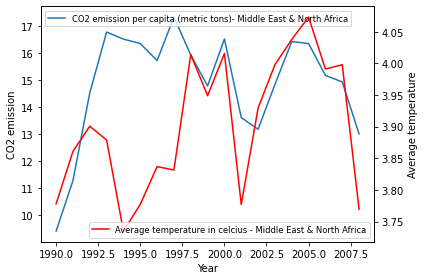

Trend Analysis
In the MENA region, both temperature and CO2 levels have increased over the years (with dips but trending upwards).
Temperature increases (and decreases) when CO2 emissions increase (decrease). This is as expected, as it will take time for a change in CO2 emissions to show its effects in change in temperature.


In [54]:

#Middle East & North Africa"]
mena_sum = mena.describe(include='all')
#print(mena_sum)
co2_mean=[]
temp_mean=[]
    
for y in year:
    co2_mean.append(mena_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(mena_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- Middle East & North Africa")
ax1.legend(loc="upper left", fontsize="small")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - Middle East & North Africa")
ax2.tick_params(axis='y')

ax2.legend(loc="lower right",fontsize="small")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("Question 2 plots/CO2_vs_avg_temp_MENA.png")
plt.show()
print(f"Trend Analysis\nIn the MENA region, both temperature and CO2 levels have increased over the years (with dips but trending upwards).\nTemperature increases (and decreases) when CO2 emissions increase (decrease). This is as expected, as it will take time for a change in CO2 emissions to show its effects in change in temperature.")

In [55]:
# create list for unique countries in region
countries=[]
countries.append(mena["Country"]) #adding countries to list
def unique_countries(country):
    unique = []
    for country in countries:
        if country in unique:
            continue
        else:
            unique.append(country)
        return unique
print(unique_countries(country))

[2                   Algeria
8                   Bahrain
36                 Djibouti
62                     Iraq
64                   Israel
68                   Jordan
71                  Lebanon
73                    Libya
79                    Malta
84                  Morocco
96                     Oman
106                   Qatar
110            Saudi Arabia
128                 Tunisia
131    United Arab Emirates
Name: Country, dtype: object]


[[ 1.         -0.26716528]
 [-0.26716528  1.        ]]
[[1.         0.23607993]
 [0.23607993 1.        ]]
[[ 1.         -0.78619177]
 [-0.78619177  1.        ]]
[[1.         0.12944917]
 [0.12944917 1.        ]]
[[1.         0.02717262]
 [0.02717262 1.        ]]
[[1.        0.2272942]
 [0.2272942 1.       ]]
[[1.         0.44426104]
 [0.44426104 1.        ]]
[[ 1.         -0.13652174]
 [-0.13652174  1.        ]]
[[ 1.         -0.18545131]
 [-0.18545131  1.        ]]
[[1.         0.38642193]
 [0.38642193 1.        ]]
[[1.        0.6809428]
 [0.6809428 1.       ]]
[[1.         0.14339528]
 [0.14339528 1.        ]]
[[ 1.         -0.34298493]
 [-0.34298493  1.        ]]
[[1.        0.4634293]
 [0.4634293 1.       ]]
[[1.         0.13118375]
 [0.13118375 1.        ]]
Each of the colours represents a country within the region. There is a varying correlation (from positive to negative or no correlation at all) between CO2 emissions and average temperature for the countries within this region.

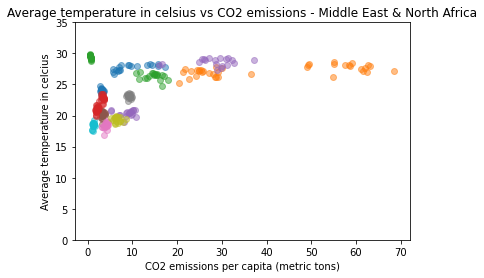

In [56]:
# scatter plot
# Loop the table
for index, row in mena.iterrows():
    # Add the key (region) to the dictionary
    co2_tmp=[]
    temp_tmp=[]
    # Loop every year from 1990 to 2008
    for y in year:
        # Add the value to the correponding country.
        co2_tmp.append(row[f"{y}_CO2"])
        temp_tmp.append(row[f"{y}_temp"])
    # create scatter plot
    plt.scatter(co2_tmp, temp_tmp, alpha=0.5)  
    # calculate correlation coefficient per country within region
    r=np.corrcoef(co2_tmp, temp_tmp)
    print(r)
    
# Set up the figure
#plt.xlim(-5,80)
plt.ylim(0,35)

plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Question 2 plots/Scatterplot_temp_co2_MENA.png')
plt.title('Average temperature in celsius vs CO2 emissions - Middle East & North Africa')

print(f"Each of the colours represents a country within the region. There is a varying correlation (from positive to negative or no correlation at all) between CO2 emissions and average temperature for the countries within this region." )

In [57]:
# chart EAP
eap

Country  1990_temp  1991_temp  1992_temp  1993_temp  1994_temp  \
6           Australia  22.355750  22.487417  21.932583  22.160167  22.030250   
21           Cambodia  27.259333  27.201417  27.070500  26.908250  27.123083   
29              China   7.636000   7.097167   6.858417   6.919417   7.496000   
43               Fiji  25.400500  25.348000  25.296333  25.007167  25.148750   
46   French Polynesia  26.849167  26.680333  26.566750  26.566417  26.657167   
61          Indonesia  26.237833  26.075167  26.170167  26.138833  26.084250   
67              Japan  13.590583  12.783167  12.484250  12.055167  13.229750   
70           Kiribati  27.075667  27.363083  27.287333  27.138583  27.247083   
77           Malaysia  26.418917  26.332083  26.286583  26.215000  26.277167   
83           Mongolia   0.662250   0.124833   0.261667  -0.212583   0.693500   
89      New Caledonia  23.412917  22.855417  22.950167  22.781000  22.671667   
90        New Zealand  11.269333  10.534333   9.936167  10.238250  10.542250   
94               Niue  25.658417  25.588000  25.494000  25.224833  25.302333   
98              Palau  27.676917  27.599583  27.539083  27.484583  27.616500   
100  Papua New Guinea  24.936750  24.726167  24.831083  24.673750  24.694833   
103       Philippines  26.932333  26.793417  26.901500  26.846333  26.831333   
109             Samoa  26.858583  26.849083  26.759167  26.522917  26.748917   
114         Singapore  27.130000  26.994083  26.997417  26.928833  27.087750   
115   Solomon Islands  27.264917  26.993417  27.001917  26.781000  26.793083   
125          Thailand  26.590667  26.653333  26.291167  26.297083  26.477000   
127             Tonga  23.639750  23.587917  23.576167  23.192333  23.227750   
135           Vietnam  24.274083  24.276500  23.851250  23.935667  24.159417   

     1995_temp  1996_temp  1997_temp  1998_temp  ...   2000_CO2   2001_CO2  \
6    21.955167  22.325333  22.086000  22.664833  ...  17.209034  16.734123   
21   27.080417  26.838833  27.219333  27.956833  ...   0.181185   0.208944   
29    7.211583   6.962667   7.367333   8.051833  ...   2.696862   2.742121   
43   25.716000  25.861083  25.323417  25.865333  ...   1.061631   1.377184   
46   26.721917  26.474583  26.543083  26.918167  ...   2.715862   3.052695   
61   26.229667  26.215000  26.371917  26.754750  ...   1.209586   1.337009   
67   12.475417  12.082833  12.752417  13.244750  ...   9.612933   9.455570   
70   27.465917  27.353500  27.496333  27.466000  ...   0.392846   0.300047   
77   26.334500  26.238917  26.556417  27.055000  ...   5.406947   5.704942   
83    0.748500  -0.082667   1.259500   1.596917  ...   3.112899   3.238448   
89   23.707417  23.611500  23.183333  24.298917  ...  10.782765   9.752839   
90   10.821083  10.743500  10.542000  11.633000  ...   8.475981   8.813841   
94   25.712583  25.713250  25.247583  25.804333  ...   1.930000   1.980022   
98   27.634083  27.701583  27.798083  28.006417  ...   6.120593   9.450057   
100  24.984000  25.042333  24.767500  25.419750  ...   0.499721   0.585408   
103  26.826417  26.887917  26.976333  27.779417  ...   1.023307   0.977209   
109  27.037333  26.845833  26.706917  27.121917  ...   0.789277   0.805049   
114  27.072500  27.043333  27.388917  27.775917  ...  11.823364  10.334595   
115  27.200500  27.124917  26.950417  27.374333  ...   0.403724   0.410128   
125  26.529917  26.185500  26.635167  27.379667  ...   3.191342   3.397343   
127  23.890083  23.993667  23.386417  24.133833  ...   1.235626   1.415025   
135  23.919000  23.749667  24.222667  24.899833  ...   0.690217   0.783903   

      2002_CO2   2003_CO2   2004_CO2   2005_CO2   2006_CO2   2007_CO2  \
6    17.372691  17.414905  17.350630  18.014056  18.232863  18.071623   
21    0.222671   0.240165   0.265145   0.278644   0.301426   0.324856   
29    2.885225   3.512245   4.080139   4.441151   4.892727   5.153564   
43    1.051133   2.027903   2.305580   1.988300   1.890969   1.747305   
46    3.05333

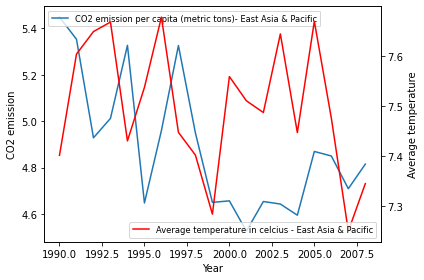

Trend Analysis
In the EAP region, with dips and peaks, temperature and CO2 emissions tend to have increased over the years.
Temperature increases when CO2 emissions increase. This is as expected, as it will take time for a change in CO2 emissions to show its effects in change in temperature.


In [58]:
# East Asia & Pacific
eap_sum = eap.describe(include='all')
co2_mean=[]
temp_mean=[]
for y in year:
    co2_mean.append(eap_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(eap_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- East Asia & Pacific")
ax1.legend(loc="upper left", fontsize='small')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - East Asia & Pacific")
ax2.tick_params(axis='y')

ax2.legend(loc="lower right",fontsize='small')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("Question 2 plots/CO2_vs_avg_temp_EAP.png")
plt.show()

print(f"Trend Analysis\nIn the EAP region, with dips and peaks, temperature and CO2 emissions tend to have increased over the years.\nTemperature increases when CO2 emissions increase. This is as expected, as it will take time for a change in CO2 emissions to show its effects in change in temperature.")

In [59]:
# create list for unique countries in region
countries=[]
countries.append(eap["Country"]) #adding countries to list
def unique_countries(country):
    unique = []
    for country in countries:
        if country in unique:
            continue
        else:
            unique.append(country)
        return unique
print(unique_countries(country))

[6             Australia
21             Cambodia
29                China
43                 Fiji
46     French Polynesia
61            Indonesia
67                Japan
70             Kiribati
77             Malaysia
83             Mongolia
89        New Caledonia
90          New Zealand
94                 Niue
98                Palau
100    Papua New Guinea
103         Philippines
109               Samoa
114           Singapore
115     Solomon Islands
125            Thailand
127               Tonga
135             Vietnam
Name: Country, dtype: object]


[[1.         0.42434919]
 [0.42434919 1.        ]]
[[1.         0.22644707]
 [0.22644707 1.        ]]
[[1.         0.48299603]
 [0.48299603 1.        ]]
[[1.         0.19434234]
 [0.19434234 1.        ]]
[[1.         0.21547148]
 [0.21547148 1.        ]]
[[1.        0.1646953]
 [0.1646953 1.       ]]
[[1.         0.04377181]
 [0.04377181 1.        ]]
[[ 1.         -0.23827857]
 [-0.23827857  1.        ]]
[[1.         0.23572797]
 [0.23572797 1.        ]]
[[ 1.         -0.20064664]
 [-0.20064664  1.        ]]
[[ 1.         -0.01514133]
 [-0.01514133  1.        ]]
[[1.         0.37189018]
 [0.37189018 1.        ]]
[[1.         0.44432689]
 [0.44432689 1.        ]]
[[ 1.         -0.02160277]
 [-0.02160277  1.        ]]
[[1.         0.27900154]
 [0.27900154 1.        ]]
[[1.         0.41550468]
 [0.41550468 1.        ]]
[[1.         0.31386437]
 [0.31386437 1.        ]]
[[ 1.         -0.14668142]
 [-0.14668142  1.        ]]
[[ 1.         -0.46834131]
 [-0.46834131  1.        ]]
[[1.       

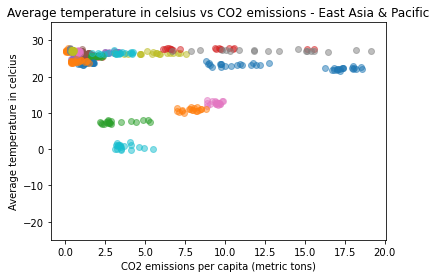

In [60]:
# scatter plot
# Loop the table
for index, row in eap.iterrows():
    # Add the key (region) to the dictionary
    co2_tmp=[]
    temp_tmp=[]
    # Loop every year from 1990 to 2008
    for y in year:
        # Add the value to the correponding country.
        co2_tmp.append(row[f"{y}_CO2"])
        temp_tmp.append(row[f"{y}_temp"])
       # Create scatter plot 
    plt.scatter(co2_tmp, temp_tmp, alpha=0.5) 
    # calculate corr efficient per country within region
    r=np.corrcoef(co2_tmp, temp_tmp)
    print(r)
# Set up the figure
#plt.xlim(-5,80)
plt.ylim(-25,35)

plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Question 2 plots/Scatterplot_temp_co2_EAP.png')
plt.title('Average temperature in celsius vs CO2 emissions - East Asia & Pacific')

print(f"Each of the colours represents a country within the region. There is a varying correlation (mostly from no to light to moderate positive) between CO2 emissions and average temperature for the countries within this region." )

In [61]:
# df ssa
ssa

Country  1990_temp  1991_temp  1992_temp  1993_temp  \
3                      Angola  22.466417  22.095417  22.498583  22.291000   
13                      Benin  27.793833  27.380917  27.230583  27.597917   
16                   Botswana  22.944833  22.059667  23.290833  22.680750   
19               Burkina Faso  28.806333  28.459417  28.132000  28.621083   
20                    Burundi  20.409333  20.238333  20.568250  20.483333   
22                   Cameroon  24.889667  24.733833  24.297333  24.662250   
24                 Cape Verde  24.745333  24.631417  24.682250  24.449667   
26   Central African Republic  25.715917  25.699833  25.092083  25.748750   
27                       Chad  27.619250  27.553500  26.919667  27.612417   
31                    Comoros  26.153250  26.196833  26.217833  26.178167   
41          Equatorial Guinea  25.285000  25.235083  24.889167  25.189333   
42                   Ethiopia  23.379583  23.412417  23.239500  22.988750   
47                      Gabon  24.570833  24.566833  24.240250  24.544500   
49                      Ghana  27.244750  26.969417  26.833250  27.088917   
54                     Guinea  26.011167  26.050667  25.784083  26.027833   
69                      Kenya  24.132417  24.371583  24.408917  24.281583   
72                    Liberia  25.881583  25.844917  25.655917  25.832583   
75                 Madagascar  23.124167  23.327000  23.341333  23.455833   
76                     Malawi  22.280250  21.889500  22.390333  21.940167   
78                       Mali  29.321083  28.855833  28.566167  28.966500   
80                 Mauritania  28.536417  28.033833  27.955000  27.858417   
81                  Mauritius  23.840667  24.138000  23.809083  23.911083   
85                 Mozambique  24.200667  24.132750  24.743000  24.247500   
86                    Namibia  21.336833  20.780750  21.336833  21.248333   
92                      Niger  28.048083  27.859167  27.185083  27.753333   
93                    Nigeria  27.366167  27.043333  26.663667  27.103333   
108                    Rwanda  19.545833  19.380750  19.692000  19.693500   
111                   Senegal  28.508000  28.490333  28.459833  28.646500   
112                Seychelles  27.220083  27.329667  26.953167  26.964583   
113              Sierra Leone  26.551417  26.621583  26.397167  26.608833   
116              South Africa  17.728333  17.752000  18.256167  18.202750   
119                     Sudan  27.644083  27.515250  26.879667  27.680250   
121                 Swaziland  19.211500  19.412417  20.269833  19.725000   
124                  Tanzania  22.714333  22.691167  22.803000  22.690000   
126                      Togo  27.516833  27.056833  26.975500  27.236750   
130                    Uganda  23.267083  23.176000  23.295417  23.390917   
136                    Zambia  22.219333  21.628917  22.414667  21.711583   
137                  Zimbabwe  22.130250  21.789667  22.840333  21.852250   

     1994_temp  1995_temp  1996_temp  1997_temp  1998_temp  ...  2000_CO2  \
3    22.189417  22.936167  22.479250  22.317167  23.120167  ...  0.685141   
13   27.335583  27.616167  27.703917  27.542000  28.088583  ...  0.248112   
16   22.379167  23.213833  22.199667  22.336833  23.070583  ...  2.432255   
19   28.039333  28.469583  28.739083  28.569167  28.992917  ...  0.084710   
20   20.539000  20.824333  20.395750  20.784250  20.813500  ...  0.047173   
22   24.631667  24.818000  24.700750  24.817333  25.323083  ...  0.218922   
24   24.458833  25.167333  25.230667  25.306167  25.373667  ...  0.427724   
26   25.682750  25.631833  25.717250  26.042667  26.204333  ...  0.072318   
27   27.261083  27.461833  27.783500  27.797417  27.895833  ...  0.021407   
31   26.452500  26.385083  25.953333  26.305167  26.647250  ...  0.149948   
41   25.286500  25.614583  25.238417  25.325250  26.003500  ...  0.873800   
42   23.208667  23.396500  23.358583  23.423833  23.689417  ...  0.088910   
47   24.647083  2

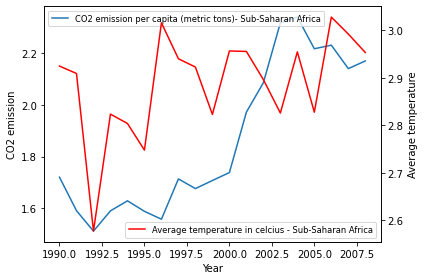

Trend Analysis
Both CO2 emissions and temperature have increased over the years.
Increase in CO2 emissions seem to result in high peaks of increase in temperature.


In [62]:
#Sub-Saharan Africa
ssa_sum = ssa.describe(include='all')
#print(ssaa_sum)
co2_mean=[]
temp_mean=[]
for y in year:
    co2_mean.append(ssa_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(ssa_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- Sub-Saharan Africa")
ax1.legend(loc="upper left",fontsize="small")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - Sub-Saharan Africa")
ax2.tick_params(axis='y')

ax2.legend(loc="lower right", fontsize="small")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("Question 2 plots/CO2_vs_avg_temp_SSA.png")
plt.show()
print(f"Trend Analysis\nBoth CO2 emissions and temperature have increased over the years.\nIncrease in CO2 emissions seem to result in high peaks of increase in temperature.")

In [63]:
# create list for unique countries in region
countries=[]
countries.append(ssa["Country"]) #adding countries to list
def unique_countries(country):
    unique = []
    for country in countries:
        if country in unique:
            continue
        else:
            unique.append(country)
        return unique
print(unique_countries(country))

[3                        Angola
13                        Benin
16                     Botswana
19                 Burkina Faso
20                      Burundi
22                     Cameroon
24                   Cape Verde
26     Central African Republic
27                         Chad
31                      Comoros
41            Equatorial Guinea
42                     Ethiopia
47                        Gabon
49                        Ghana
54                       Guinea
69                        Kenya
72                      Liberia
75                   Madagascar
76                       Malawi
78                         Mali
80                   Mauritania
81                    Mauritius
85                   Mozambique
86                      Namibia
92                        Niger
93                      Nigeria
108                      Rwanda
111                     Senegal
112                  Seychelles
113                Sierra Leone
116                South Africa
119    

[[1.00000000e+00 8.32112693e-04]
 [8.32112693e-04 1.00000000e+00]]
[[1.         0.57686724]
 [0.57686724 1.        ]]
[[1.         0.08167722]
 [0.08167722 1.        ]]
[[1.         0.32134658]
 [0.32134658 1.        ]]
[[ 1.         -0.60049236]
 [-0.60049236  1.        ]]
[[ 1.         -0.05866622]
 [-0.05866622  1.        ]]
[[1.         0.28534361]
 [0.28534361 1.        ]]
[[ 1.         -0.66977782]
 [-0.66977782  1.        ]]
[[1.         0.57642173]
 [0.57642173 1.        ]]
[[1.         0.17363662]
 [0.17363662 1.        ]]
[[1.         0.52569376]
 [0.52569376 1.        ]]
[[1.         0.19939814]
 [0.19939814 1.        ]]
[[ 1.         -0.35312184]
 [-0.35312184  1.        ]]
[[1.         0.70785583]
 [0.70785583 1.        ]]
[[ 1.         -0.57103896]
 [-0.57103896  1.        ]]
[[ 1.         -0.08522154]
 [-0.08522154  1.        ]]
[[1.         0.41868928]
 [0.41868928 1.        ]]
[[1.         0.04595161]
 [0.04595161 1.        ]]
[[ 1.         -0.49769947]
 [-0.49769947  

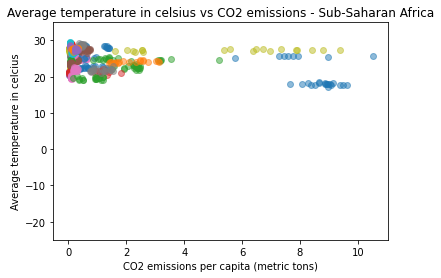

In [64]:
# scatter plot
# Loop the table
for index, row in ssa.iterrows():
    # Add the key (region) to the dictionary
    co2_tmp=[]
    temp_tmp=[]
    # Loop every year from 1990 to 2008
    for y in year:
        # Add the value to the correponding country.
        co2_tmp.append(row[f"{y}_CO2"])
        temp_tmp.append(row[f"{y}_temp"])
    # create scatter plot
    plt.scatter(co2_tmp, temp_tmp, alpha=0.5)  
    # calculate corr efficient per region
    r=np.corrcoef(co2_tmp, temp_tmp)
    print(r)

# Set up the figure
#plt.xlim(-5,80)
plt.ylim(-25,35)

plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Question 2 plots/Scatterplot_temp_co2_SSA.png')
plt.title('Average temperature in celsius vs CO2 emissions - Sub-Saharan Africa')

print(f"Each of the colours represents a country within the region. There is a varying correlation (from positive to negative or no correlation at all) between CO2 emissions and average temperature for the countries within this region." )

In [65]:
# df lac
lac

Country  1990_temp  1991_temp  1992_temp  1993_temp  \
4             Argentina  15.155083  15.097583  14.739167  15.098667   
5                 Aruba  28.243333  28.343083  28.498750  28.589167   
10             Barbados  26.943167  26.893167  26.904667  27.056833   
12               Belize  25.550333  25.863333  25.647917  25.603083   
15              Bolivia  21.326083  21.754083  21.205917  21.524917   
17               Brazil  25.274917  25.292167  25.251333  25.354917   
25       Cayman Islands  27.361417  27.368917  27.132083  27.261667   
28                Chile   9.831250   9.725417   9.737750   9.944583   
30             Colombia  25.219167  25.341833  25.533583  25.206417   
32           Costa Rica  26.290250  26.289917  26.361750  26.319333   
33                 Cuba  26.133417  26.165833  25.859583  25.874417   
37             Dominica  26.629833  26.544583  26.619000  26.647917   
38   Dominican Republic  26.171167  26.053417  25.941333  25.916500   
39              Ecuador  22.434750  22.529500  22.611500  22.421583   
40          El Salvador  25.566500  25.640750  25.781917  25.663083   
52              Grenada  27.205667  27.141667  27.157083  27.348417   
53            Guatemala  23.599500  23.877583  23.790750  23.776333   
55               Guyana  26.565750  26.441750  26.503583  26.310417   
56                Haiti  26.942917  26.854000  26.671833  26.619583   
57             Honduras  25.209500  25.337500  25.461583  25.292000   
66              Jamaica  26.740250  26.687833  26.720417  26.523000   
82               Mexico  20.960833  20.839667  20.650333  20.938833   
91            Nicaragua  26.554750  26.610250  26.731250  26.611250   
99               Panama  26.925333  27.068083  27.108500  26.937000   
101            Paraguay  23.599417  24.115667  23.090750  23.734250   
102                Peru  20.233083  20.504250  20.836583  20.502500   
120            Suriname  26.677083  26.676417  26.805583  26.589583   
134             Uruguay  17.703583  17.973917  17.528833  17.646417   

     1994_temp  1995_temp  1996_temp  1997_temp  1998_temp  ...   2000_CO2  \
4    15.578667  15.149833  15.211583  15.620667  15.261750  ...   3.820041   
5    28.482250  28.736417  28.479583  28.763333  28.982500  ...  24.738875   
10   26.960083  27.326000  27.018250  27.239333  27.625083  ...   4.441343   
12   25.908917  26.004750  25.450500  26.088250  26.228167  ...   2.759792   
15   21.984750  21.730583  21.053667  21.611333  21.467333  ...   1.145931   
17   25.454667  25.554417  25.337833  25.559417  25.958750  ...   1.892645   
25   27.636917  27.584000  27.129167  27.751667  27.701000  ...  11.312551   
28   10.054333   9.784917   9.758000  10.337000  10.292417  ...   3.897244   
30   25.162417  25.492833  25.149917  25.580000  25.879167  ...   1.456687   
32   26.425833  26.292833  25.962500  26.806250  26.974083  ...   1.396933   
33   26.264667  26.127500  25.801333  26.638250  26.407083  ...   2.344978   
37   26.624500  26.974333  26.632500  26.957167  27.268000  ...   1.473705   
38   26.280583  26.357750  25.870750  26.697250  26.676333  ...   2.341392   
39   22.217083  22.574167  22.032500  23.082917  23.121000  ...   1.696411   
40   25.913167  25.734083  25.354417  26.035750  26.131083  ...   0.966705   
52   27.251000  27.635333  27.286250  27.452333  27.946000  ...   2.022734   
53   24.021667  23.960667  23.450083  24.076833  24.306500  ...   0.882396   
55   26.430250  26.888000  26.487583  26.736167  27.138500  ...   2.155879   
56   27.105250  27.104250  26.656083  27.545833  27.395417  ...   0.158211   
57   25.675833  25.832167  25.179333  25.839667  26.099250  ...   0.809103   
66   26.911000  26.893917  26.474833  27.199167  27.235583  ...   3.985087   
82   21.325750  21.370667  21.132167  20.898583  21.531750  ...   3.831766   
91   26.866917  26.921750  26.409750  27.026833  27.396250  ...   0.722746   
99   27.006000  26.958083  26.668333  27.412917  27.547417  ...   1.958710   
101  2

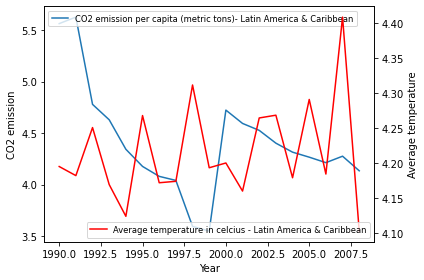

Trend Analysis
In the LAC region, temperature has increased over the years whereas CO2 emissions have decreased.
There does not seem to be a relationship between these two variables.


In [66]:
#Latin America & Caribbean
lac_sum = lac.describe(include='all')
#print(mena_sum)
lac = lac.describe(include='all')
#print(eap)
co2_mean=[]
temp_mean=[]
for y in year:
    co2_mean.append(lac_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(lac_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- Latin America & Caribbean")
ax1.legend(loc="upper left", fontsize="small")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - Latin America & Caribbean")
ax2.tick_params(axis='y')

ax2.legend(loc="lower right", fontsize="small")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("Question 2 plots/CO2_vs_avg_temp_LAC.png")
plt.show()
print(f"Trend Analysis\nIn the LAC region, temperature has increased over the years whereas CO2 emissions have decreased.\nThere does not seem to be a relationship between these two variables.")

In [67]:
# create list for unique countries in region
countries=[]
countries.append(lac["Country"]) #adding countries to list
def unique_countries(country):
    unique = []
    for country in countries:
        if country in unique:
            continue
        else:
            unique.append(country)
        return unique
print(unique_countries(country))

[count                 28
unique                28
top       Cayman Islands
freq                   1
mean                 NaN
std                  NaN
min                  NaN
25%                  NaN
50%                  NaN
75%                  NaN
max                  NaN
Name: Country, dtype: object]


[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]]
[[ 1.         -0.06535364]
 [-0.06535364  1.        ]]
[[ 1.         -0.14816859]
 [-0.14816859  1.        ]]
[[1.        0.0655639]
 [0.0655639 1.       ]]
[[1.         0.11925461]
 [0.11925461 1.        ]]
[[ 1.         -0.01608479]
 [-0.01608479  1.        ]]
[[1.         0.30677046]
 [0.30677046 1.        ]]
[[ 1.         -0.40528881]
 [-0.40528881  1.        ]]


C:\Users\Heesu Ha\.conda\envs\PythonData\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


Each of the colours represents a country within the region. There is a very moderate positive or negative correlation for some of the countries, or no correlation at all between CO2 emissions and average temperature for the countries within this region.


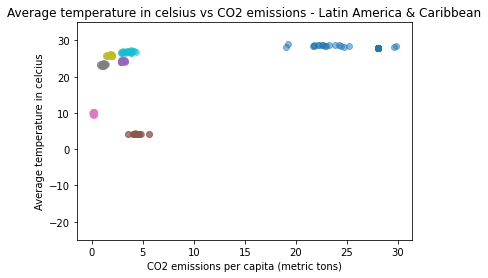

In [68]:
# scatter plot
# Loop the table
for index, row in lac.iterrows():
    # Add the key (region) to the dictionary
    co2_tmp=[]
    temp_tmp=[]
    # Loop every year from 1990 to 2008
    for y in year:
        # Add the value to the correponding country.
        co2_tmp.append(row[f"{y}_CO2"])
        temp_tmp.append(row[f"{y}_temp"])
    # create scatter plot
    plt.scatter(co2_tmp, temp_tmp, alpha=0.5)  
    # calculate corr efficient per country within region
    r=np.corrcoef(co2_tmp, temp_tmp)
    print(r)

# Set up the figure
#plt.xlim(-5,80)
plt.ylim(-25,35)

plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Question 2 plots/Scatterplot_temp_co2_lac.png')
plt.title('Average temperature in celsius vs CO2 emissions - Latin America & Caribbean')

print(f"Each of the colours represents a country within the region. There is a very moderate positive or negative correlation for some of the countries, or no correlation at all between CO2 emissions and average temperature for the countries within this region." )

In [69]:
# df na
na

Country  1990_temp  1991_temp  1992_temp  1993_temp  1994_temp  \
23          Canada  -5.021917  -4.426667  -4.928917   -4.40150  -4.433667   
133  United States   9.521583   9.493667   9.056333    8.86725   9.270333   

     1995_temp  1996_temp  1997_temp  1998_temp  ...   2000_CO2   2001_CO2  \
23   -4.314333  -4.941167  -4.231500  -2.553917  ...  17.465315  16.959428   
133   9.331000   8.754333   9.172917  10.141167  ...  19.535600  18.906592   

      2002_CO2   2003_CO2   2004_CO2   2005_CO2   2006_CO2   2007_CO2  \
23   16.639004  17.473123  17.373523  17.417569  16.806157  16.502056   
133  18.894165  18.846932  18.986097  18.919023  18.469206  18.507650   

      2008_CO2         Region  
23   16.333481  North America  
133  17.941729  North America  

[2 rows x 40 columns]

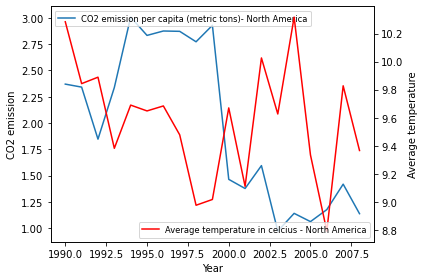

Trend Analysis
In the NA region, there is no clear upward or downward trend in increase in temperature and CO2 emissions.
Increase in CO2 emissions seems to be followed by increase in temperature. This is as expected. From 2000 onwards, temperature has increased whereas CO2 emissions have decreased.


In [70]:
#North America
na_sum = na.describe(include='all')
#print(na)
#na = na.describe(include='all')
#print(eap)
co2_mean=[]
temp_mean=[]
for y in year:
    co2_mean.append(na_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(na_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- North America")
ax1.legend(loc="upper left", fontsize="small")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - North America")
ax2.tick_params(axis='y')

ax2.legend(loc="lower right", fontsize="small")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("Question 2 plots/CO2_vs_avg_temp_NA.png")
plt.show()
print(f"Trend Analysis\nIn the NA region, there is no clear upward or downward trend in increase in temperature and CO2 emissions.\nIncrease in CO2 emissions seems to be followed by increase in temperature. This is as expected. From 2000 onwards, temperature has increased whereas CO2 emissions have decreased.")

In [71]:
# create list for unique countries in region
countries=[]
countries.append(na["Country"]) #adding countries to list
def unique_countries(country):
    unique = []
    for country in countries:
        if country in unique:
            continue
        else:
            unique.append(country)
        return unique
print(unique_countries(country))

[23            Canada
133    United States
Name: Country, dtype: object]


[[1.         0.13076765]
 [0.13076765 1.        ]]
[[ 1.         -0.28682026]
 [-0.28682026  1.        ]]
Each of the colours represents a country within the region. There is a light positive and light negative correlation between CO2 emissions and average temperature for the countries within this region.


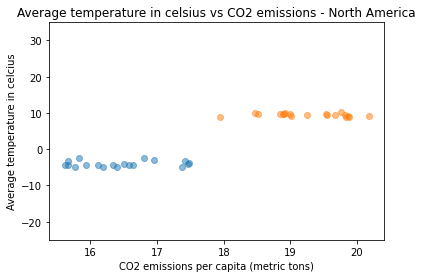

In [72]:
# scatter plot
# Loop the table
for index, row in na.iterrows():
    # Add the key (region) to the dictionary
    co2_tmp=[]
    temp_tmp=[]
    # Loop every year from 1990 to 2008
    for y in year:
        # Add the value to the correponding country.
        co2_tmp.append(row[f"{y}_CO2"])
        temp_tmp.append(row[f"{y}_temp"])
    # create scatter plot
    plt.scatter(co2_tmp, temp_tmp, alpha=0.5) 
    # Calculate corr efficient per country within region
    r=np.corrcoef(co2_tmp, temp_tmp)
    print(r)
 

# Set up the figure
#plt.xlim(-5,80)
plt.ylim(-25,35)

plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Question 2 plots/Scatterplot_temp_co2_na.png')
plt.title('Average temperature in celsius vs CO2 emissions - North America')

print(f"Each of the colours represents a country within the region. There is a light positive and light negative correlation between CO2 emissions and average temperature for the countries within this region." )

## Question 4: What is the relationship between the global average temperature and global population? (Chad)

### Findings:

Population Analysis:

Question 4: What is the relationship between the global average temperature and global population?

Results & Analysis:

The primary asumption made by many people is that the global population is increasing rapidly. And as general rule, this is mostly true.

However, although our population has nearly more than doubled in the last fourty five years from 1970 - 2015 as shown below:

1970	3,700,437,046	2.06%

2015	7,379,797,139	1.16%

It is the percentage change that has slowed the growth in relative terms (or populationn as a percentage of poppulation growth has decreased). As such, the Hypothesis is essentially valid in-terms of percentage decrease, however is still growing, just a slower rate.

As a reference, please refer to .png file: Net Global Increase_Population.

It is also worth noting that the trend in net population growth as a pecentage has been dropping at a relatively even rate of decline.

As a result of the above results and analysis, it was important to have a look at factors which may also be a factor in the decline of population percentage growth. 


Net Global Movement_Urbanisation

Utilising the available data within the same dataset, we decided to explore urbanisation and it's effect on populations. Again, the analysis was very insightful showing in 1990 only 36% of the world was urbanised. In 2015, it was 54%. 

As a reference, please refer to .png file: Net Global Increase_Population.

This shows a rapid increase in urbanisationn, and as a result of this, a slowing in population increase as urban families tend to have less children (Ref: IIED’s Human Settlements group, Authors Gordon McGranahan & David Satterthwaite).

This also adds another insight to as why population as a percentage is declining. 

It is worth considering that additional datasets could have been used and merged such as mortality rates and international migration patterns. One can fairly assume these would show that poorer areas would move to more wealthier urban areas and those poorer areas would have both higher infant mortality rates and lower life expectancies.

In [73]:
file_to_load = "Resources/global_population_1970_2020_51_years.csv"

global_pop = pd.read_csv(file_to_load)

global_pop.head()

# Lets see what I have...

# Next Step - clense

Year World Population  Yearly         Net  Density          Urban  \
0     NaN              NaN  Change      Change  (P/Km²)            Pop   
1  2020.0    7,794,798,739   1.05%  81,330,639       52  4,378,993,944   
2  2019.0    7,713,468,100   1.08%  82,377,060       52  4,299,438,618   
3  2018.0    7,631,091,040   1.10%  83,232,115       51  4,219,817,318   
4  2017.0    7,547,858,925   1.12%  83,836,876       51  4,140,188,594   

  Urban.1  Unnamed: 7                                          Data link  
0   Pop %         NaN  https://www.worldometers.info/world-population...  
1     56%         NaN                                                NaN  
2     56%         NaN                                                NaN  
3     55%         NaN                                                NaN  
4     55%         NaN                                                NaN

In [74]:
# What type of data am I dealing with?
global_pop.dtypes

Year                float64
World Population     object
Yearly               object
Net                  object
Density              object
Urban                object
Urban.1              object
Unnamed: 7          float64
Data link            object
dtype: object

In [75]:
global_pop = global_pop.drop(global_pop.index[0])

In [76]:
global_pop.head()

Year World Population Yearly         Net Density          Urban Urban.1  \
1  2020.0    7,794,798,739  1.05%  81,330,639      52  4,378,993,944     56%   
2  2019.0    7,713,468,100  1.08%  82,377,060      52  4,299,438,618     56%   
3  2018.0    7,631,091,040  1.10%  83,232,115      51  4,219,817,318     55%   
4  2017.0    7,547,858,925  1.12%  83,836,876      51  4,140,188,594     55%   
5  2016.0    7,464,022,049  1.14%  84,224,910      50  4,060,652,683     54%   

   Unnamed: 7 Data link  
1         NaN       NaN  
2         NaN       NaN  
3         NaN       NaN  
4         NaN       NaN  
5         NaN       NaN

In [77]:
# strip the percentage sign from column

global_pop['Yearly'] = global_pop['Yearly'].str.replace('%', '')

# convert column to numeric 

global_pop['Yearly'] = global_pop['Yearly'].astype(float)

In [78]:
global_pop.head()

Year World Population  Yearly         Net Density          Urban Urban.1  \
1  2020.0    7,794,798,739    1.05  81,330,639      52  4,378,993,944     56%   
2  2019.0    7,713,468,100    1.08  82,377,060      52  4,299,438,618     56%   
3  2018.0    7,631,091,040    1.10  83,232,115      51  4,219,817,318     55%   
4  2017.0    7,547,858,925    1.12  83,836,876      51  4,140,188,594     55%   
5  2016.0    7,464,022,049    1.14  84,224,910      50  4,060,652,683     54%   

   Unnamed: 7 Data link  
1         NaN       NaN  
2         NaN       NaN  
3         NaN       NaN  
4         NaN       NaN  
5         NaN       NaN

In [79]:
# Drop unwanted columns for the Global Population ONLY

global_pop_only = global_pop.drop(['Net', 'Density', 'Urban', 'Urban.1', 'Unnamed: 7', 'Data link'],axis=1)

In [80]:
global_pop_only

Year World Population  Yearly
1   2020.0    7,794,798,739    1.05
2   2019.0    7,713,468,100    1.08
3   2018.0    7,631,091,040    1.10
4   2017.0    7,547,858,925    1.12
5   2016.0    7,464,022,049    1.14
6   2015.0    7,379,797,139    1.16
7   2014.0    7,295,290,765    1.17
8   2013.0    7,210,581,976    1.19
9   2012.0    7,125,828,059    1.20
10  2011.0    7,041,194,301    1.21
11  2010.0    6,956,823,603    1.22
12  2009.0    6,872,767,093    1.23
13  2008.0    6,789,088,686    1.24
14  2007.0    6,705,946,610    1.24
15  2006.0    6,623,517,833    1.25
16  2005.0    6,541,907,027    1.25
17  2004.0    6,461,159,389    1.25
18  2003.0    6,381,185,114    1.26
19  2002.0    6,301,773,188    1.27
20  2001.0    6,222,626,606    1.29
21  2000.0    6,143,493,823    1.31
22  1999.0    6,064,239,055    1.33
23  1998.0    5,984,793,942    1.35
24  1997.0    5,905,045,788    1.38
25  1996.0    5,824,891,951    1.40
26  1995.0    5,744,212,979    1.43
27  1994.0    5,663,150,427    1.46
28  1993.0    5,581,597,546    1.50
29  1992.0    5,498,919,809    1.56
30  1991.0    5,414,289,444    1.63
31  1990.0    5,327,231,061    1.71
32  1989.0    5,237,441,558    1.79
33  1988.0    5,145,426,008    1.84
34  1987.0    5,052,522,147    1.85
35  1986.0    4,960,567,912    1.84
36  1985.0    4,870,921,740    1.82
37  1984.0    4,784,011,621    1.80
38  1983.0    4,699,569,304    1.78
39  1982.0    4,617,386,542    1.77
40  1981.0    4,536,996,762    1.77
41  1980.0    4,458,003,514    1.77
42  1979.0    4,380,506,100    1.76
43  1978.0    4,304,533,501    1.77
44  1977.0    4,229,506,060    1.80
45  1976.0    4,154,666,864    1.84
46  1975.0    4,079,480,606    1.89
47  1974.0    4,003,794,172    1.94
48  1973.0    3,927,780,238    1.98
49  1972.0    3,851,650,245    2.01
50  1971.0    3,775,759,617    2.04
51  1970.0    3,700,437,046    2.06

In [81]:
# Create dataframe for Global Urbanisation

global_urbanisation_only = global_pop.drop(['World Population', 'Yearly', 'Unnamed: 7', 'Data link'],axis=1)

In [82]:
global_urbanisation_only.head()

Year         Net Density          Urban Urban.1
1  2020.0  81,330,639      52  4,378,993,944     56%
2  2019.0  82,377,060      52  4,299,438,618     56%
3  2018.0  83,232,115      51  4,219,817,318     55%
4  2017.0  83,836,876      51  4,140,188,594     55%
5  2016.0  84,224,910      50  4,060,652,683     54%

In [83]:
# Cleanse and rename columns to clearly representwhat I am after.

global_urbanisation_only.rename(columns={'Urban.1': 'Percentage Change'}, inplace=True)
global_urbanisation_only.rename(columns={'Net': 'Net Global Growth'}, inplace=True)
global_urbanisation_only.rename(columns={'Density': 'Density per SqKlm'}, inplace=True)
global_urbanisation_only.rename(columns={'Urban': 'Urban Change'}, inplace=True)

global_urbanisation_only.head()

Year Net Global Growth Density per SqKlm   Urban Change Percentage Change
1  2020.0        81,330,639                52  4,378,993,944               56%
2  2019.0        82,377,060                52  4,299,438,618               56%
3  2018.0        83,232,115                51  4,219,817,318               55%
4  2017.0        83,836,876                51  4,140,188,594               55%
5  2016.0        84,224,910                50  4,060,652,683               54%

In [84]:
# converting Year to integer and cleanse

global_urbanisation_only['Year'] = global_urbanisation_only['Year'].astype('int64')
global_urbanisation_only.head()

Year Net Global Growth Density per SqKlm   Urban Change Percentage Change
1  2020        81,330,639                52  4,378,993,944               56%
2  2019        82,377,060                52  4,299,438,618               56%
3  2018        83,232,115                51  4,219,817,318               55%
4  2017        83,836,876                51  4,140,188,594               55%
5  2016        84,224,910                50  4,060,652,683               54%

In [85]:
# strip the percentage sign from column

global_urbanisation_only['Percentage Change'] = global_urbanisation_only['Percentage Change'].str.replace('%', '')

# convert column to numeric 

global_urbanisation_only['Percentage Change'] = global_urbanisation_only['Percentage Change'].astype(float)

global_urbanisation_only.head()

Year Net Global Growth Density per SqKlm   Urban Change  Percentage Change
1  2020        81,330,639                52  4,378,993,944               56.0
2  2019        82,377,060                52  4,299,438,618               56.0
3  2018        83,232,115                51  4,219,817,318               55.0
4  2017        83,836,876                51  4,140,188,594               55.0
5  2016        84,224,910                50  4,060,652,683               54.0

In [86]:
# Look at what I have in percentage terms and determiine what is occuring

global_urbanisation_only['Percentage Change'] = global_urbanisation_only['Percentage Change']
global_urbanisation_only['Percentage Change']

1     56.0
2     56.0
3     55.0
4     55.0
5     54.0
6     54.0
7     53.0
8     53.0
9     53.0
10    52.0
11    52.0
12    51.0
13    51.0
14    50.0
15    50.0
16    49.0
17    49.0
18    48.0
19    48.0
20    47.0
21    47.0
22    46.0
23    46.0
24    46.0
25    45.0
26    45.0
27    44.0
28    44.0
29    44.0
30    43.0
31    43.0
32    43.0
33    42.0
34    42.0
35    42.0
36    41.0
37    41.0
38    41.0
39    40.0
40    40.0
41    39.0
42    39.0
43    39.0
44    38.0
45    38.0
46    38.0
47    37.0
48    37.0
49    37.0
50    37.0
51    37.0
Name: Percentage Change, dtype: float64

In [87]:
# Review changes

global_urbanisation_only.head()

Year Net Global Growth Density per SqKlm   Urban Change  Percentage Change
1  2020        81,330,639                52  4,378,993,944               56.0
2  2019        82,377,060                52  4,299,438,618               56.0
3  2018        83,232,115                51  4,219,817,318               55.0
4  2017        83,836,876                51  4,140,188,594               55.0
5  2016        84,224,910                50  4,060,652,683               54.0

In [88]:
# Cleanse data to our parameters (1990 -2015)

global_urban_movement_1990_to_2015 = global_urbanisation_only[global_urbanisation_only['Year']<=2015]
global_urban_movement_1990_to_2015 = global_urban_movement_1990_to_2015[global_urban_movement_1990_to_2015['Year']>=1990]
global_urban_movement_1990_to_2015

Year Net Global Growth Density per SqKlm   Urban Change  Percentage Change
6   2015        84,506,374                50  3,981,497,663               54.0
7   2014        84,708,789                49  3,902,831,934               53.0
8   2013        84,753,917                48  3,824,990,329               53.0
9   2012        84,633,758                48  3,747,842,586               53.0
10  2011        84,370,698                47  3,671,423,872               52.0
11  2010        84,056,510                47  3,594,868,146               52.0
12  2009        83,678,407                46  3,516,830,263               51.0
13  2008        83,142,076                46  3,439,719,128               51.0
14  2007        82,428,777                45  3,363,609,560               50.0
15  2006        81,610,806                44  3,289,446,226               50.0
16  2005        80,747,638                44  3,215,905,863               49.0
17  2004        79,974,275                43  3,143,044,892               49.0
18  2003        79,411,926                43  3,071,743,997               48.0
19  2002        79,146,582                42  3,001,808,223               48.0
20  2001        79,132,783                42  2,933,078,510               47.0
21  2000        79,254,768                41  2,868,307,513               47.0
22  1999        79,445,113                41  2,808,231,655               46.0
23  1998        79,748,154                40  2,749,213,598               46.0
24  1997        80,153,837                40  2,690,813,541               46.0
25  1996        80,678,972                39  2,632,941,583               45.0
26  1995        81,062,552                39  2,575,505,235               45.0
27  1994        81,552,881                38  2,518,254,111               44.0
28  1993        82,677,737                37  2,461,223,528               44.0
29  1992        84,630,365                37  2,404,337,297               44.0
30  1991        87,058,383                36  2,347,462,336               43.0
31  1990        89,789,503                36  2,290,228,096               43.0

In [89]:
# Drop unwanted columns for target data for Global Population and cleanse to our parameters (1990 -2015)

global_pop_only_change_1990_to_2015 = global_pop_only[global_pop_only['Year']<=2015]
global_pop_only_change_1990_to_2015 = global_pop_only_change_1990_to_2015[global_pop_only_change_1990_to_2015['Year']>=1990]
global_pop_only_change_1990_to_2015.rename(columns={'Yearly': 'Percentage Change'}, inplace=True)
global_pop_only_change_1990_to_2015['Year'] = global_pop_only_change_1990_to_2015['Year'].astype('int64')
global_pop_only_change_1990_to_2015.head()

Year World Population  Percentage Change
6   2015    7,379,797,139               1.16
7   2014    7,295,290,765               1.17
8   2013    7,210,581,976               1.19
9   2012    7,125,828,059               1.20
10  2011    7,041,194,301               1.21

In [90]:
global_pop_only_change_1990_to_2015

Year World Population  Percentage Change
6   2015    7,379,797,139               1.16
7   2014    7,295,290,765               1.17
8   2013    7,210,581,976               1.19
9   2012    7,125,828,059               1.20
10  2011    7,041,194,301               1.21
11  2010    6,956,823,603               1.22
12  2009    6,872,767,093               1.23
13  2008    6,789,088,686               1.24
14  2007    6,705,946,610               1.24
15  2006    6,623,517,833               1.25
16  2005    6,541,907,027               1.25
17  2004    6,461,159,389               1.25
18  2003    6,381,185,114               1.26
19  2002    6,301,773,188               1.27
20  2001    6,222,626,606               1.29
21  2000    6,143,493,823               1.31
22  1999    6,064,239,055               1.33
23  1998    5,984,793,942               1.35
24  1997    5,905,045,788               1.38
25  1996    5,824,891,951               1.40
26  1995    5,744,212,979               1.43
27  1994    5,663,150,427               1.46
28  1993    5,581,597,546               1.50
29  1992    5,498,919,809               1.56
30  1991    5,414,289,444               1.63
31  1990    5,327,231,061               1.71

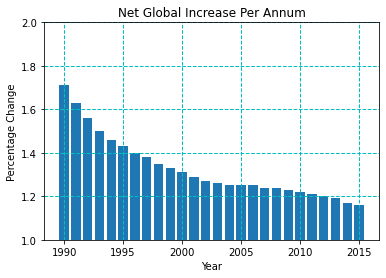

In [91]:
# Plot in bar chart Gloabl Population Change as a yearly percentage change (Clear and Concise)

#plt.rcParams['axes.facecolor'] = 'black'
plt.bar(global_pop_only_change_1990_to_2015['Year'], global_pop_only_change_1990_to_2015['Percentage Change'])
plt.ylabel('Percentage Change')
plt.xlabel('Year')
plt.title('Net Global Increase Per Annum')
plt.grid(color='c', linestyle='--', linewidth=1,)
plt.ylim(1,2)
plt.savefig("Q4_plots/Net Global Increase_Population.png")

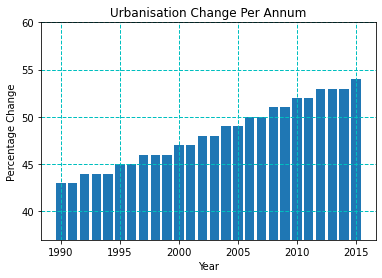

In [92]:
# Plot in bar chart Gloabl Urban Movement Change as a yearly percentage change (Clear and Concise)

plt.bar(global_urban_movement_1990_to_2015['Year'], global_urban_movement_1990_to_2015['Percentage Change'])


plt.ylabel('Percentage Change')
plt.xlabel('Year')
plt.title('Urbanisation Change Per Annum')
plt.grid(color='c', linestyle='--', linewidth=1,)
plt.ylim(37,60)
plt.savefig("Q4_plots/Net_Global_Movement_Urbanisation.png")

## Question 5 (Zheng)
### Is there a correlation between a country’s yearly average CO2 levels and life expectancy? Does a country’s CO2 level affect the life expectancy of a population?

### Findings: 
* Globally, life expectancy increases as CO2 emission per capita increase.
* The relationship between life expectancy and CO2 is exponential
* The R squared value of the proposed predicing model is about 0.59.
* This means that the relationship between CO2 and life expectancy may be not that close as we expected.

In [93]:
# Read Life Expectancy data from csv file 
lf_df = pd.read_csv("data_sets/Lifeexpectancy.csv")

# Clean data after 2015 for later comparison
for x in range(2016,2021):
    # drop the columns if year=x.
    lf_df=lf_df.drop(columns=[f"{x}"])
lf_df.head()

Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Life expectancy at birth, total (years)   
1  Afghanistan          AFG  Life expectancy at birth, total (years)   
2       Angola          AGO  Life expectancy at birth, total (years)   
3      Albania          ALB  Life expectancy at birth, total (years)   
4      Andorra          AND  Life expectancy at birth, total (years)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  SP.DYN.LE00.IN  65.662  66.074  66.444  66.787  67.113  67.435  ...   
1  SP.DYN.LE00.IN  32.446  32.962  33.471  33.971  34.463  34.948  ...   
2  SP.DYN.LE00.IN  37.524  37.811  38.113  38.430  38.760  39.102  ...   
3  SP.DYN.LE00.IN  62.283  63.301  64.190  64.914  65.463  65.850  ...   
4  SP.DYN.LE00.IN     NaN     NaN     NaN     NaN     NaN     NaN  ...   

     2006    2007    2008    2009    2010    2011    2012    2013    2014  \
0  74.429  74.576  74.725  74.872  75.017  75.158  75.299  75.441  75.583   
1  58.826  59.375  59.930  60.484  61.028  61.553  62.054  62.525  62.966   
2  51.143  52.177  53.243  54.311  55.350  56.330  57.236  58.054  58.776   
3  75.423  75.646  75.912  76.221  76.562  76.914  77.252  77.554  77.813   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     2015  
0  75.725  
1  63.377  
2  59.398  
3  78.025  
4     NaN  

[5 rows x 60 columns]

In [94]:
# Read CO2 data from csv file 
co2_df = pd.read_csv("data_sets/CO2emission_percapita.csv")

# Clean data after 2015 for later comparison
for x in range(2016,2021):
    # drop the columns if year=x.
    co2_df=co2_df.drop(columns=[f"{x}"])

# Preview CO2 emission dataframe
co2_df.head()

Country Name Country Code                          Indicator Name  \
0        Aruba          ABW  CO2 emissions (metric tons per capita)   
1  Afghanistan          AFG  CO2 emissions (metric tons per capita)   
2       Angola          AGO  CO2 emissions (metric tons per capita)   
3      Albania          ALB  CO2 emissions (metric tons per capita)   
4      Andorra          AND  CO2 emissions (metric tons per capita)   

   Indicator Code        1960        1961        1962        1963        1964  \
0  EN.ATM.CO2E.PC  204.620372  208.822811  226.118079  214.800370  207.615777   
1  EN.ATM.CO2E.PC    0.046057    0.053589    0.073721    0.074161    0.086174   
2  EN.ATM.CO2E.PC    0.100835    0.082204    0.210531    0.202737    0.213560   
3  EN.ATM.CO2E.PC    1.258195    1.374186    1.439956    1.181681    1.111742   
4  EN.ATM.CO2E.PC         NaN         NaN         NaN         NaN         NaN   

         1965  ...       2006       2007       2008       2009       2010  \
0  185.203958  ...  26.947726  27.895023  26.229553  25.915322  24.670529   
1    0.101285  ...   0.062428   0.083893   0.151721   0.238399   0.289988   
2    0.205891  ...   1.105019   1.203134   1.185000   1.234425   1.244092   
3    1.166099  ...   1.302576   1.322335   1.484311   1.495600   1.578574   
4         NaN  ...   6.746052   6.519387   6.427810   6.121580   6.122595   

        2011       2012      2013      2014      2015  
0  24.507516  13.157722  8.353561  8.410064  8.610374  
1   0.406424   0.345149  0.280455  0.253728  0.262556  
2   1.262825   1.361181  1.295075  1.664741  1.240245  
3   1.803715   1.697966  1.697279  1.900070  1.602648  
4   5.867410   5.916884  5.901775  5.832906  5.969786  

[5 rows x 60 columns]

In [95]:
# Merge life expectancy and CO2 dataframes with the key "Country Name"
co2_lf_df=lf_df.merge(co2_df,how="inner",on="Country Name", suffixes=('_lf', '_co2'))
# Preview data
co2_lf_df.head()

Country Name Country Code_lf                        Indicator Name_lf  \
0        Aruba             ABW  Life expectancy at birth, total (years)   
1  Afghanistan             AFG  Life expectancy at birth, total (years)   
2       Angola             AGO  Life expectancy at birth, total (years)   
3      Albania             ALB  Life expectancy at birth, total (years)   
4      Andorra             AND  Life expectancy at birth, total (years)   

  Indicator Code_lf  1960_lf  1961_lf  1962_lf  1963_lf  1964_lf  1965_lf  \
0    SP.DYN.LE00.IN   65.662   66.074   66.444   66.787   67.113   67.435   
1    SP.DYN.LE00.IN   32.446   32.962   33.471   33.971   34.463   34.948   
2    SP.DYN.LE00.IN   37.524   37.811   38.113   38.430   38.760   39.102   
3    SP.DYN.LE00.IN   62.283   63.301   64.190   64.914   65.463   65.850   
4    SP.DYN.LE00.IN      NaN      NaN      NaN      NaN      NaN      NaN   

   ...   2006_co2   2007_co2   2008_co2   2009_co2   2010_co2   2011_co2  \
0  ...  26.947726  27.895023  26.229553  25.915322  24.670529  24.507516   
1  ...   0.062428   0.083893   0.151721   0.238399   0.289988   0.406424   
2  ...   1.105019   1.203134   1.185000   1.234425   1.244092   1.262825   
3  ...   1.302576   1.322335   1.484311   1.495600   1.578574   1.803715   
4  ...   6.746052   6.519387   6.427810   6.121580   6.122595   5.867410   

    2012_co2  2013_co2  2014_co2  2015_co2  
0  13.157722  8.353561  8.410064  8.610374  
1   0.345149  0.280455  0.253728  0.262556  
2   1.361181  1.295075  1.664741  1.240245  
3   1.697966  1.697279  1.900070  1.602648  
4   5.916884  5.901775  5.832906  5.969786  

[5 rows x 119 columns]

In [96]:
# Clean NAN value from merged dataframe 
co2_lf_df.dropna(inplace=True)

# Clean druplicated coutnry from merged dataframe 
co2_lf_df.drop_duplicates(subset=['Country Name'],inplace=True)

# Clean negative value
for y in range(1960,2016):
    co2_lf_df=co2_lf_df[co2_lf_df[f"{y}_co2"]>=0]
    co2_lf_df=co2_lf_df[co2_lf_df[f"{y}_lf"]>=0]

co2_lf_df.reset_index(drop=True).head()

Country Name Country Code_lf                        Indicator Name_lf  \
0        Aruba             ABW  Life expectancy at birth, total (years)   
1  Afghanistan             AFG  Life expectancy at birth, total (years)   
2       Angola             AGO  Life expectancy at birth, total (years)   
3      Albania             ALB  Life expectancy at birth, total (years)   
4   Arab World             ARB  Life expectancy at birth, total (years)   

  Indicator Code_lf    1960_lf    1961_lf    1962_lf    1963_lf    1964_lf  \
0    SP.DYN.LE00.IN  65.662000  66.074000  66.444000  66.787000  67.113000   
1    SP.DYN.LE00.IN  32.446000  32.962000  33.471000  33.971000  34.463000   
2    SP.DYN.LE00.IN  37.524000  37.811000  38.113000  38.430000  38.760000   
3    SP.DYN.LE00.IN  62.283000  63.301000  64.190000  64.914000  65.463000   
4    SP.DYN.LE00.IN  46.546909  47.141621  47.731783  48.320432  48.910019   

     1965_lf  ...   2006_co2   2007_co2   2008_co2   2009_co2   2010_co2  \
0  67.435000  ...  26.947726  27.895023  26.229553  25.915322  24.670529   
1  34.948000  ...   0.062428   0.083893   0.151721   0.238399   0.289988   
2  39.102000  ...   1.105019   1.203134   1.185000   1.234425   1.244092   
3  65.850000  ...   1.302576   1.322335   1.484311   1.495600   1.578574   
4  49.496478  ...   4.287323   4.118447   4.408396   4.562925   4.630645   

    2011_co2   2012_co2  2013_co2  2014_co2  2015_co2  
0  24.507516  13.157722  8.353561  8.410064  8.610374  
1   0.406424   0.345149  0.280455  0.253728  0.262556  
2   1.262825   1.361181  1.295075  1.664741  1.240245  
3   1.803715   1.697966  1.697279  1.900070  1.602648  
4   4.572407   4.956928  4.801390  4.981330  4.933420  

[5 rows x 119 columns]

In [97]:
# Transfer "Country Name" column to a list of country
country=co2_lf_df["Country Name"].tolist()
#print(country)

In [98]:
# Create two dictionaries of CO2 and Life expectancy.
# Keys are country names and values are list of CO2/Life expectancy data
co2_dict={}
lf_dict={}

In [99]:
# Loop every country in the country list
for x in country:
    # Add the key (coutry) to the dictionary
    co2_dict[x]=[]
    lf_dict[x]=[]
    # Loop every year from 1960 to 2015
    for y in range(1960,2016):
        # Add the value to the correponding country.
        co2_dict[x].append(co2_lf_df[f"{y}_co2"][co2_lf_df["Country Name"]==x].values[0])
        lf_dict[x].append(co2_lf_df[f"{y}_lf"][co2_lf_df["Country Name"]==x].values[0])

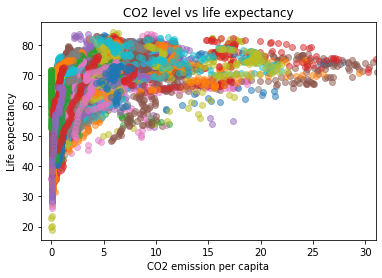

In [100]:
# Combine all the co2/life expectancy data together for curve fitting
co2=[]
lf=[]
# Loop every coutnry in the country list
for x in country:
    for y in co2_dict[x]:
        co2.append(y)
    for y in lf_dict[x]:
        lf.append(y)
    # Plot the CO2/Life expectancy data of each country
    plt.scatter(co2_dict[x], lf_dict[x], alpha=0.5)

#plt.scatter(co2, lf, alpha=0.5, facecolors='none', edgecolors='blue')

# Set up the figure
plt.xlim(-1,31)
plt.xlabel("CO2 emission per capita")
plt.ylabel("Life expectancy")
plt.title("CO2 level vs life expectancy")
plt.savefig("Q5_plots\Global_CO2_vs_LifeExpectancy.png")
plt.show()

* Globally, life expectancy increases as CO2 emission per capita increase.
* The relationship between life expectancy and CO2 is exponential

0.003079225


C:\Users\Heesu Ha\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


The r squared value is 0.592


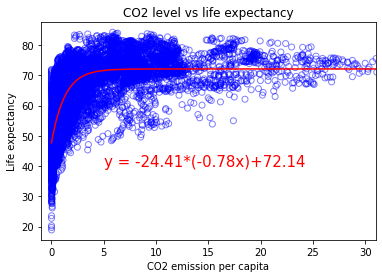

In [101]:
# Define the function we will use for curve fitting.
def func(x, a, b, c):
    return a * np.exp(-b *x) + c

print(min(co2))
# Curve fitting the data
popt, pcov = curve_fit(func, co2, lf)
x_values= np.arange(0.0, 50.0, 0.1)
y_values = [func(x, *popt) for x in x_values]

line_eq = "y = " + str(round(popt[0],2)) + "*(" + str(round(-popt[1],2))+"x)+"+str(round(popt[2],2))
#print(min(co2))
residuals=[]
for i in range(len(co2)):
    residuals.append(lf[i]- func(co2[i], popt[0],popt[1],popt[2]))
ss_res=0.0
for i in range(len(co2)):
    ss_res += residuals[i]**2
    ss_tot = np.sum((lf-np.mean(lf))**2)
r_squared = 1 - (ss_res / ss_tot)
#perr = np.sqrt(np.diag(pcov))
print(f"The r squared value is {round(r_squared, 3)}")

plt.scatter(co2, lf, alpha=0.5, facecolors='none', edgecolors='blue')
plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=15,color="red")
plt.xlim(-1,31)
plt.xlabel("CO2 emission per capita")
plt.ylabel("Life expectancy")
plt.title("CO2 level vs life expectancy")

plt.savefig("Q5_plots\Curve_fitting_Global_CO2_vs_LifeExpectancy.png")
plt.show()

* The R squared value of the proposed predicing model is about 0.59.
* This means that the relationship between CO2 and life expectancy may be not that close as we expected.

### Is there a correlation between average CO2 emission vs average Life expectancy?
* The average values of CO2/life expectancy show that no obvious correlation is found.
* The relationship between CO2 and life expectancy should be examined regionally.

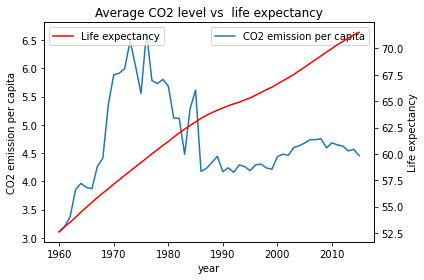

In [102]:
co2_lf_sum=co2_lf_df.describe()
co2_mean=[]
lf_mean=[]
# Create year list
year=[x for x in range(1960,2016)]
for y in year:
    co2_mean.append(co2_lf_sum.iloc[1][f"{y}_co2"])
    lf_mean.append(co2_lf_sum.iloc[1][f"{y}_lf"])

fig, ax1 = plt.subplots()

# Plot average CO2 emission
ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
ax1.plot(year,co2_mean,label="CO2 emission per capita")
#ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="best")

# Plot average life expectancy
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
ax2.plot(year, lf_mean,color="r",label="Life expectancy")
ax2.tick_params(axis='y')

ax2.legend(loc="best")
plt.title("Average CO2 level vs  life expectancy")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Q5_plots\Global_CO2_vs_LifeExpectancy_average_value.png")
plt.show()

* The average values of CO2/life expectancy show that no obvious correlation is found.
* The relationship between CO2 and life expectancy should be examined regionally.

### Is there an effect of CO2 emission on Life expectancy in different countries?
* Developed countries: The CO2 emissions in developed countries are higher. CO2 emission change has little effect on life expectancy.
* Developing countries: The CO2 emissions in developing countries are lower. Life expectancy increases as CO2 emission increases in developing countries.

### Developed countries

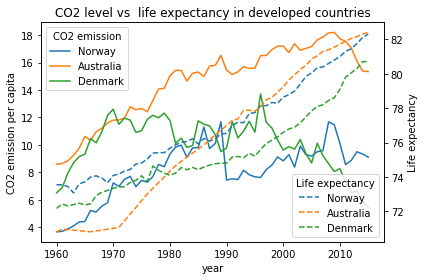

In [103]:
# Developed countries list
Developed_Country=["Norway","Australia","Denmark"]
fig, ax1 = plt.subplots()

ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
# plot co2 emission in developed countries
for x in Developed_Country:
    ax1.plot(year,co2_dict[x])
ax1.tick_params(axis='y')
ax1.legend(Developed_Country,title='CO2 emission',loc='upper left')

# plot life expectancy in developed countries
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
for x in Developed_Country:
    ax2.plot(year, lf_dict[x],linestyle='dashed')
ax2.tick_params(axis='y')
ax2.legend(Developed_Country, title='Life expectancy',loc="lower right")

plt.title("CO2 level vs  life expectancy in developed countries")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Q5_plots\CO2_vs_LifeExpectancy_developed_countries.png")
plt.show()

* The CO2 emissions in developed coutries are higher.
* CO2 emission change has little effect on life expectancy.

### Developing countries

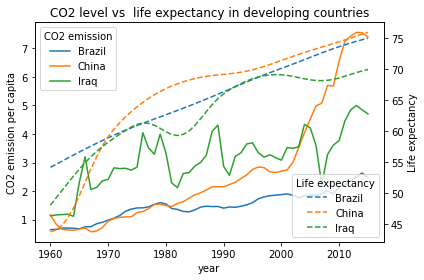

In [104]:
Developing_Country=["Brazil","China","Iraq"]
fig, ax1 = plt.subplots()

ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
# plot co2 emission in developing countries
for x in Developing_Country:
    ax1.plot(year,co2_dict[x])
    
#ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(Developing_Country,title='CO2 emission',loc='upper left')

# plot life expectancy in developing countries
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
for x in Developing_Country:
    ax2.plot(year, lf_dict[x],linestyle='dashed',)
ax2.tick_params(axis='y')
ax2.legend(Developing_Country, title='Life expectancy',loc="lower right")

plt.title("CO2 level vs  life expectancy in developing countries")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Q5_plots\CO2_vs_LifeExpectancy_developing_countries.png")
plt.show()

* The CO2 emissions in developing coutries are lower.
* Life expectancy increases as CO2 emission increases in developing countries.